<a href="https://colab.research.google.com/github/EwuramaBoateng-Yeboah/97502025_Churning_Customers/blob/main/CustomerChurn_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all needed libraries
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from keras import Input, Model
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Collection

In [ ]:
churn_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
churn_data['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7043, dtype: object

In [ ]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Total charges had some empty spaces which wasnt reflecting in the info, this code is to replace all those with nan.
churn_data['TotalCharges'].replace(' ', np.nan,inplace=True)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#changing the datatype of Totalcharges to be able to use the median in imputer
churn_data['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# **Explorative Data Analysis**

In [ ]:
#Creating a pie chart to check the likelihood of a customer churning
c_counts=churn_data['Churn'].value_counts()

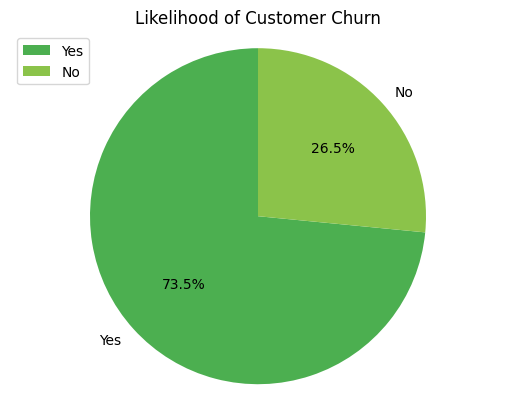

In [ ]:

# Sample data
titles=["Yes","No"]
plt.pie(c_counts, labels=titles, autopct='%1.1f%%', startangle=90,colors= ['#4CAF50', '#8BC34A'])
plt.title('Likelihood of Customer Churn')
plt.legend(loc='upper left', labels=titles)
plt.axis('equal')
plt.show()


According to the pie chart, 73.46% of customers are likely not to churn and and 26.54% are likely to churn.

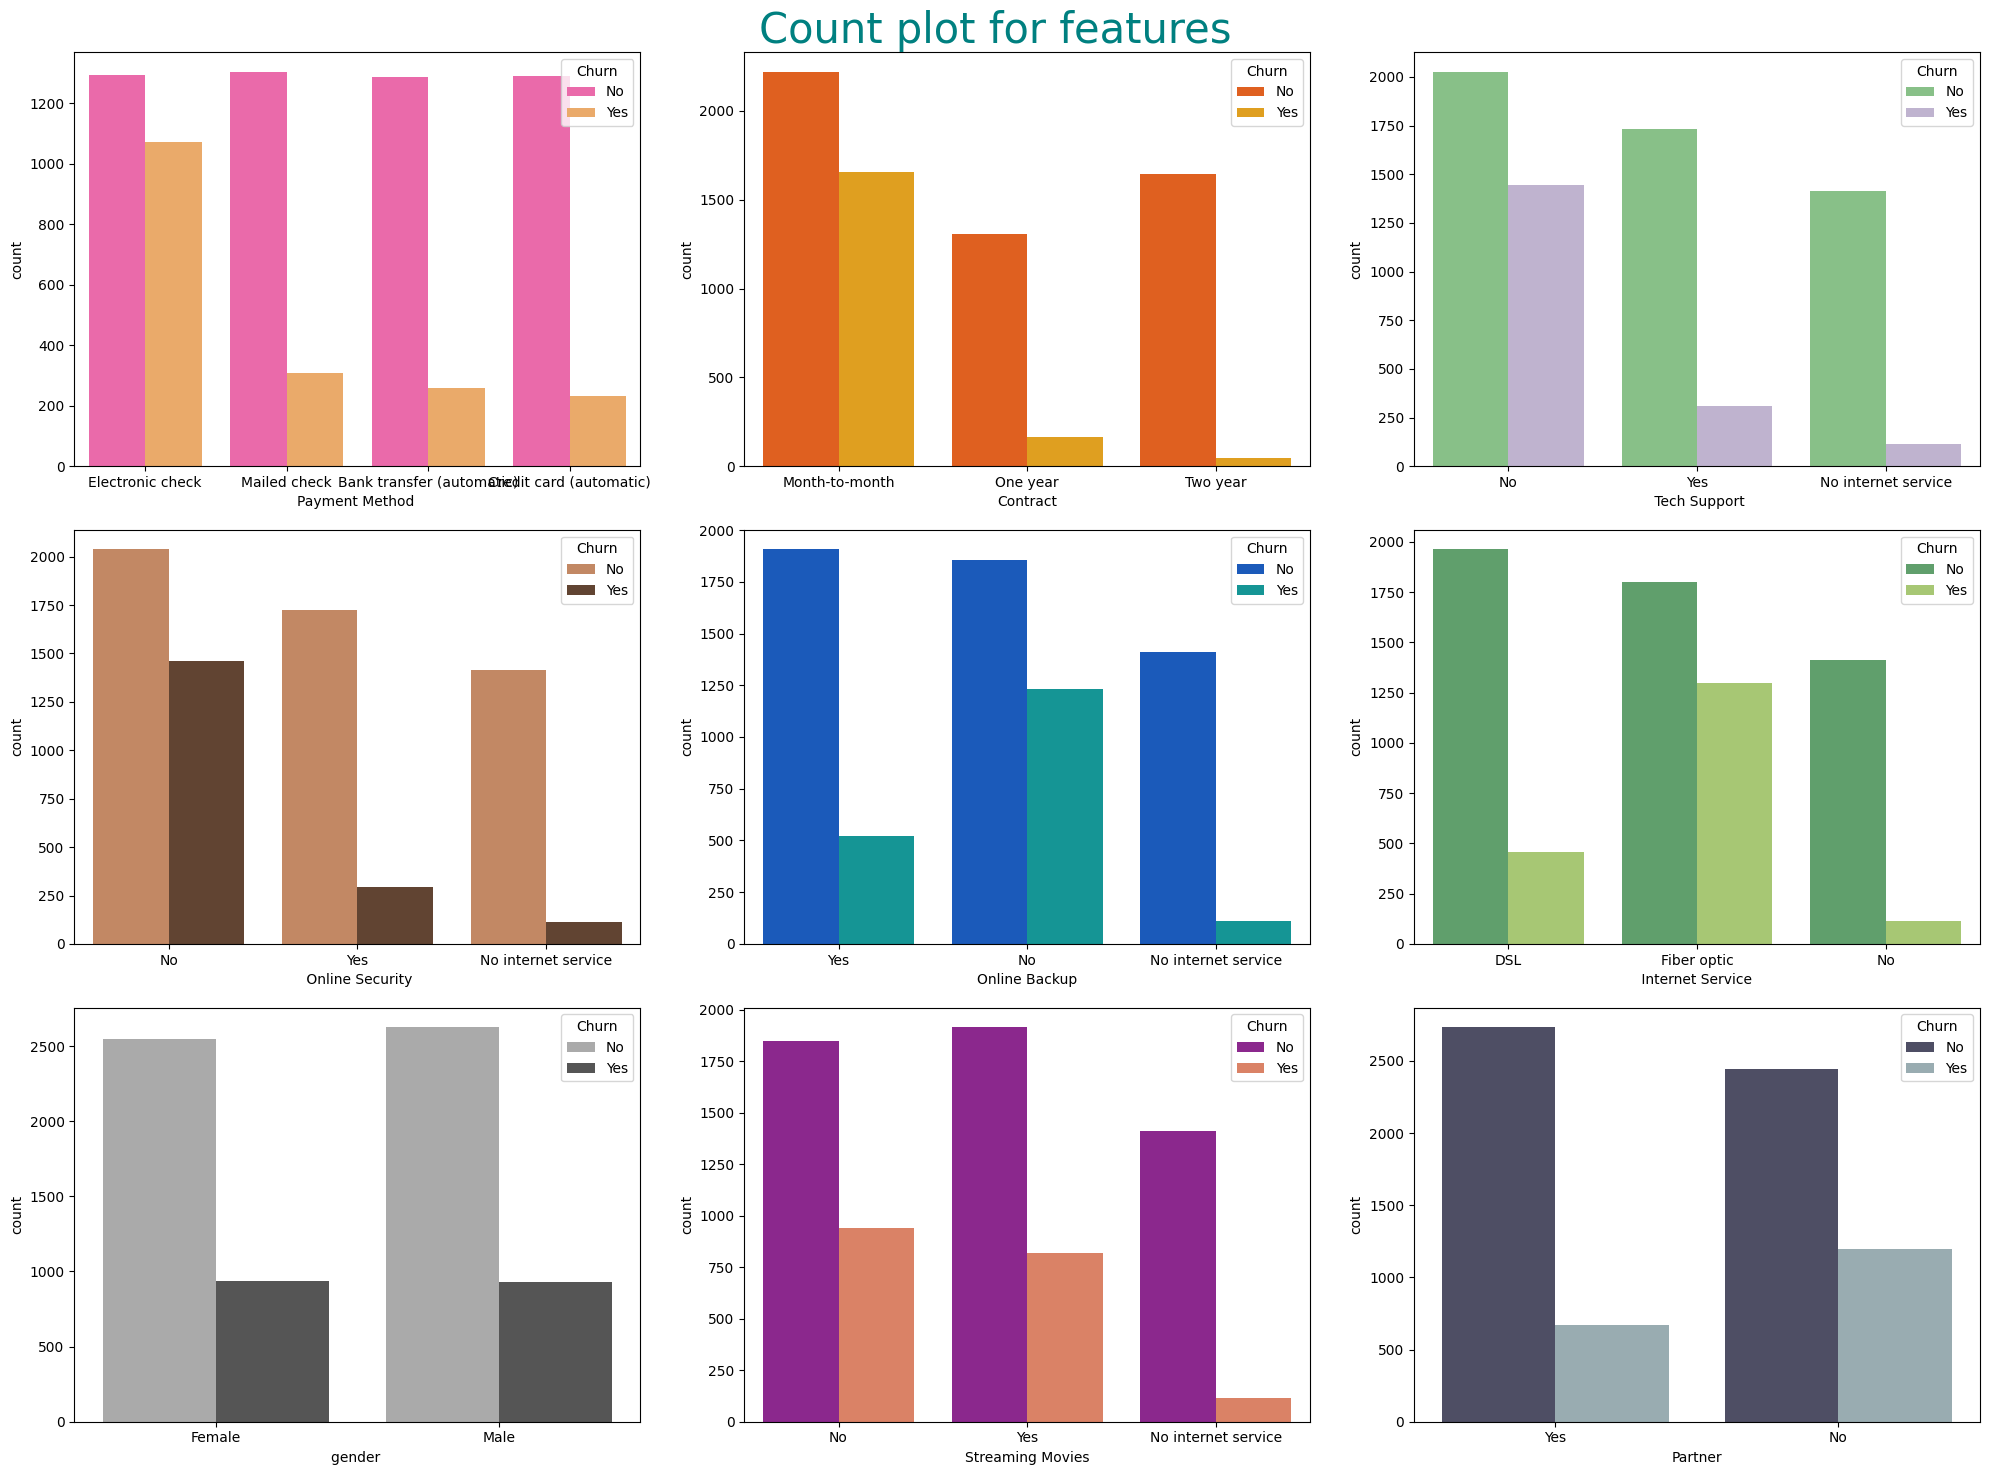

In [ ]:
#using seaborn to analyse the categorical features

fig, ax = plt.subplots(3, 3, figsize = (20, 15))

plt.suptitle('Count plot for features', fontsize = 30, color= 'teal')

diag1 = sns.countplot(x ='Contract', data= churn_data, hue= 'Churn', ax= ax[0, 1], palette= 'autumn')
diag1.set(xlabel = 'Contract')

diag2 = sns.countplot(x ='PaymentMethod', data= churn_data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
diag2.set(xlabel = 'Payment Method ')

diag3 = sns.countplot(x ='TechSupport', data= churn_data, hue= 'Churn', ax= ax[0, 2], palette= 'Accent')
diag3.set(xlabel = ' Tech Support')

diag4 = sns.countplot(x ='OnlineSecurity', data= churn_data, hue= 'Churn', ax= ax[1, 0], palette= 'copper_r')
diag4.set(xlabel = ' Online Security')

diag5 = sns.countplot(x ='OnlineBackup', data= churn_data, hue= 'Churn', ax= ax[1, 1], palette= 'winter')
diag5.set(xlabel = 'Online Backup')

diag6 = sns.countplot(x ='InternetService', data= churn_data, hue= 'Churn', ax= ax[1, 2], palette= 'summer')
diag6.set(xlabel = ' Internet Service ')

diag7 = sns.countplot(x ='gender', data= churn_data, hue= 'Churn', ax= ax[2, 0], palette= 'binary')
diag7.set(xlabel = 'gender ')

diag8 = sns.countplot(x ='StreamingMovies', data= churn_data, hue= 'Churn', ax= ax[2, 1], palette= 'plasma')
diag8.set(xlabel = 'Streaming Movies')

diag9 = sns.countplot(x ='Partner', data= churn_data, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
diag9.set(xlabel = 'Partner')

plt.tight_layout()
plt.show()


According to the plot,
1. Customers that do not stream movies at all are more likely to churn that those that do and those that cant due to inaccessibility to internet service.

2. Customers that have no device protection ,tech support and online backup are also more likely to churn.

3. Also, customers with fiber optic internet service are more likely to churn.

4. Customers with no partners are more likely to churn.

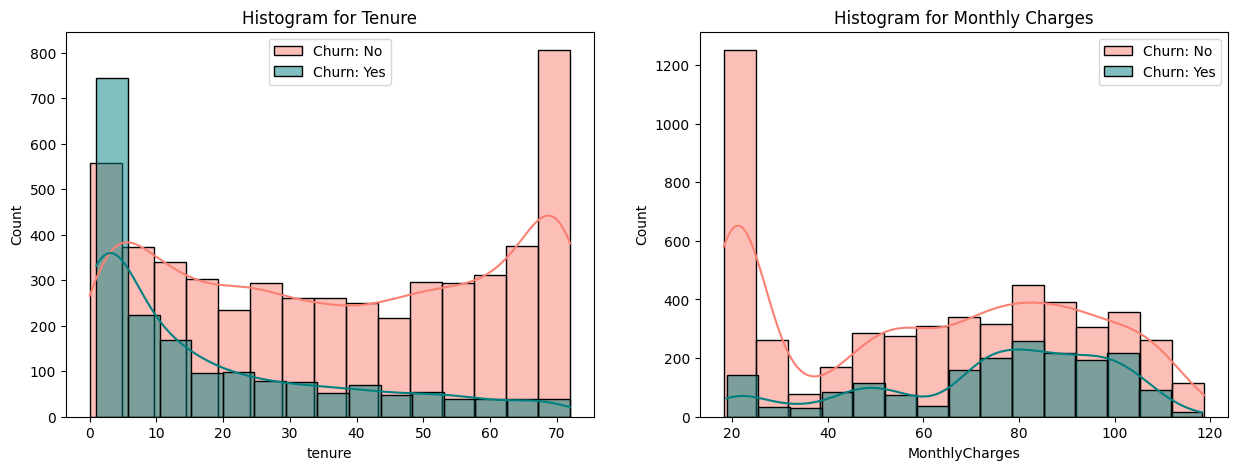

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'churn_data' is your DataFrame
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Create histograms using Seaborn for 'Churn' categories
sns.histplot(churn_data[churn_data['Churn'] == 'No']['tenure'], bins=15, kde=True, ax=axes[0], color='salmon', label='Churn: No')
axes[0].set_title('Histogram for Tenure')

sns.histplot(churn_data[churn_data['Churn'] == 'Yes']['tenure'], bins=15, kde=True, ax=axes[0], color='teal', label='Churn: Yes')

sns.histplot(churn_data[churn_data['Churn'] == 'No']['MonthlyCharges'], bins=15, kde=True, ax=axes[1], color='salmon', label='Churn: No')
axes[1].set_title('Histogram for Monthly Charges')

sns.histplot(churn_data[churn_data['Churn'] == 'Yes']['MonthlyCharges'], bins=15, kde=True, ax=axes[1], color='teal', label='Churn: Yes')

for ax in axes:
    ax.legend()
plt.show()


It can be seen from the histogram that the more years a customer stays with the company, they are less likely to churn.

# **Data Preprocessing**

In [ ]:
#we will drop customerID because it would not be necessary in our analysis
churn_data.drop('customerID', axis = 1, inplace = True)

In [ ]:
Y = pd.DataFrame()
Y = churn_data['Churn'] # separate the churn column as the Y (Target)
churn_data.drop('Churn', axis = 1, inplace = True) # drop churn
Y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [ ]:
#label encoding our target variable
label_encoder = LabelEncoder()
Y= label_encoder.fit_transform(Y)


In [ ]:
Y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
#we will impute the using median
imp = SimpleImputer(strategy = 'median')
to_impute = ['TotalCharges']
churn_data[to_impute] = imp.fit_transform(churn_data[to_impute])
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#encode the object data using the label encoder
encoded_columns=churn_data.copy() #creating a copy of the churn_data to work with
for c in churn_data.select_dtypes("object").columns:
  label_encoder = LabelEncoder()
  encoded_columns[c] = label_encoder.fit_transform(churn_data[c])
encoded_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
encoded_columns.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
encoded_columns['Churn'] = Y
print(encoded_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
#removing overall from the training data
Y = encoded_columns['Churn'] # extract overall
encoded_columns.drop('Churn', axis = 1, inplace = True) # drop overall
encoded_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
# scaling the data
sc = StandardScaler()  # scaling the data set to be used in the model
training_x = sc.fit_transform(encoded_columns)
training_x = pd.DataFrame(training_x, columns = encoded_columns.columns)
training_x.head(5)



import pickle
with open('scalar_model.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [ ]:
training_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994242
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173244
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.959674
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.194766
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.940470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.128655
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.243151
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.854469
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.872062


# **Selecting Relevant Features**

In [ ]:
#Training using rf for Feature Importance
model=RandomForestClassifier()
model.fit(training_x,Y)

RandomForestClassifier()

In [ ]:
#Getting the Important Features from our dataset
name_of_feature=training_x.columns #contains the names of features in our dataset
feature_importance=model.feature_importances_ #contains the scores of each feature

#Sorting the Feature Importance
feature_importance_df=pd.DataFrame({'Feature':name_of_feature,'Importance':feature_importance}) #creates a dataframe with the names of our feature and corresponding scores
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False) #sorts our results from highest to lowest
feature_importance_df


,Feature,Importance
18,TotalCharges,0.193769
17,MonthlyCharges,0.181549
4,tenure,0.156998
14,Contract,0.071896
16,PaymentMethod,0.051972
8,OnlineSecurity,0.043373
11,TechSupport,0.041431
9,OnlineBackup,0.030257
0,gender,0.028078
7,InternetService,0.027015


In [ ]:
#Using the first 9 features
first_nine_features = feature_importance_df['Feature'].values[:9]
first_nine_features
#the model was tested using 10 features intially but the auc score proved better on 9 features

array(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
       'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'OnlineBackup',
       'gender'], dtype=object)

# Scaling for App

In [ ]:
#scaling
sc = StandardScaler()  # scaling the data set to be used in the model
training_s = sc.fit_transform(encoded_columns[first_nine_features])
training_s

import pickle
with open('scaled_model.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [ ]:
#updates to our new training_x value
training_x = training_x[first_nine_features]

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(training_x,Y,test_size=0.2,random_state=42) #splitting our data
x_validate,x_test,y_validate,y_test=train_test_split(Xtest,Ytest,test_size=0.5,random_state=42)

In [ ]:
#using functional API
input_layer = Input(shape=(Xtrain.shape[1],))
#hidden layers
first_hidden = Dense(25, activation='relu')(input_layer)
second_hidden = Dense(20, activation='relu')(first_hidden)
third_hidden = Dense(15, activation='relu')(second_hidden)
#output layer
output_layer = Dense(1, activation='sigmoid')(third_hidden)

#model creation
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])


In [ ]:
train_hist = model.fit(Xtrain,Ytrain,epochs=100,batch_size=32,validation_data=(x_validate, y_validate),verbose=1)

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 0.6403 - accuracy: 0.6667 - val_loss: 0.6045 - val_accuracy: 0.7401
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5709 - accuracy: 0.7543 - val_loss: 0.5451 - val_accuracy: 0.7599
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5226 - accuracy: 0.7634 - val_loss: 0.5034 - val_accuracy: 0.7727
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4920 - accuracy: 0.7835 - val_loss: 0.4774 - val_accuracy: 0.7912
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.7868 - val_loss: 0.4605 - val_accuracy: 0.7869
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7888 - val_loss: 0.4510 - val_accuracy: 0.7898
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7872 - val_loss: 0.4453 - val_accuracy: 0.7912

In [ ]:
loss,accuracy = model.evaluate(Xtest, Ytest, verbose=0)

#Test Loss
print(f'Test Loss: {loss:.4f}')

#Test Accuracy
print(f'Test Accuracy: {accuracy*100:.4f}')

Test Loss: 0.4077
Test Accuracy: 80.9084


In [ ]:
!pip install tensorflow scikeras scikit-learn

In [ ]:
from scikeras.wrappers import KerasClassifier
#creating a model for the keras classifier
def c_model(hidden_units=25):
  input_layer = Input(shape=(Xtrain.shape[1],))
  first_hidden = Dense(hidden_units, activation='relu')(input_layer)
  second_hidden = Dense(20, activation='relu')(first_hidden)
  third_hidden = Dense(15, activation='tanh')(second_hidden)
  output_layer = Dense(1, activation='sigmoid')(third_hidden)

  k_model = Model(inputs=input_layer, outputs=output_layer)

  k_model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
  return k_model

# creating the keras Classifier object
model = KerasClassifier(build_fn=c_model,epochs=10, batch_size=32, hidden_units=32,verbose=True)

# Initialize the KFold class
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

#define hyperparameter grid
PARAMETERS = {
   'hidden_units': [32,64,128],
   'optimizer': ['adam','sgd','rmsprop'],
   'batch_size':[16,32,64],

    }

from sklearn.metrics import make_scorer

# Initialize the GridSearchCV
ker_cv = GridSearchCV(estimator= model, param_grid=PARAMETERS, cv=cv, scoring='accuracy')
gs_result=ker_cv.fit(Xtrain,Ytrain,validation_data=(x_validate, y_validate),verbose=True,callbacks=[train_hist])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.7602 - val_loss: 0.4380 - val_accuracy: 0.7969
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.7894 - val_loss: 0.4344 - val_accuracy: 0.7926
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.7950 - val_loss: 0.4304 - val_accuracy: 0.7955
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.7928 - val_loss: 0.4298 - val_accuracy: 0.7955
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.8005 - val_loss: 0.4288 - val_accuracy: 0.8011
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8014 - val_loss: 0.4269 - val_accuracy: 0.7940
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4157 - accuracy: 0.7992 - val_loss: 0.4293 - val_accuracy: 0.7969
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4613 - accuracy: 0.7666 - val_loss: 0.4411 - val_accuracy: 0.7983
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.7905 - val_loss: 0.4347 - val_accuracy: 0.7997
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.7897 - val_loss: 0.4334 - val_accuracy: 0.7955
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.7965 - val_loss: 0.4286 - val_accuracy: 0.8026
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4239 - accuracy: 0.7948 - val_loss: 0.4266 - val_accuracy: 0.7969
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4219 - accuracy: 0.7968 - val_loss: 0.4291 - val_accuracy: 0.7955
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.7976 - val_loss: 0.4252 - val_accuracy: 0.7969
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 6ms/step - loss: 0.4772 - accuracy: 0.7692 - val_loss: 0.4338 - val_accuracy: 0.8011
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4359 - accuracy: 0.7925 - val_loss: 0.4279 - val_accuracy: 0.7940
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4304 - accuracy: 0.7939 - val_loss: 0.4270 - val_accuracy: 0.7884
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4288 - accuracy: 0.7908 - val_loss: 0.4227 - val_accuracy: 0.7912
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4260 - accuracy: 0.7945 - val_loss: 0.4247 - val_accuracy: 0.7912
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.7937 - val_loss: 0.4236 - val_accuracy: 0.7940
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.7996 - val_loss: 0.4204 - val_accuracy: 0.8011
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4803 - accuracy: 0.7613 - val_loss: 0.4345 - val_accuracy: 0.7812
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4329 - accuracy: 0.7928 - val_loss: 0.4273 - val_accuracy: 0.7969
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.7957 - val_loss: 0.4279 - val_accuracy: 0.7983
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.7950 - val_loss: 0.4215 - val_accuracy: 0.7997
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.8005 - val_loss: 0.4206 - val_accuracy: 0.8026
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.8008 - val_loss: 0.4242 - val_accuracy: 0.7955
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8039 - val_loss: 0.4254 - val_accuracy: 0.8026
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4943 - accuracy: 0.7613 - val_loss: 0.4347 - val_accuracy: 0.7898
Epoch 2/10
282/282 [==============================] - 2s 6ms/step - loss: 0.4420 - accuracy: 0.7879 - val_loss: 0.4279 - val_accuracy: 0.8011
Epoch 3/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4354 - accuracy: 0.7915 - val_loss: 0.4289 - val_accuracy: 0.7898
Epoch 4/10
282/282 [==============================] - 2s 6ms/step - loss: 0.4337 - accuracy: 0.7937 - val_loss: 0.4265 - val_accuracy: 0.7983
Epoch 5/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4302 - accuracy: 0.7959 - val_loss: 0.4275 - val_accuracy: 0.7955
Epoch 6/10
282/282 [==============================] - 2s 5ms/step - loss: 0.4280 - accuracy: 0.7961 - val_loss: 0.4256 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 3s 9ms/step - loss: 0.4260 - accuracy: 0.7995 - val_loss: 0.4260 - val_accuracy: 0.7955
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
282/282 [==============================] - 4s 7ms/step - loss: 0.4766 - accuracy: 0.7566 - val_loss: 0.4352 - val_accuracy: 0.7926
Epoch 2/10
282/282 [==============================] - 3s 9ms/step - loss: 0.4292 - accuracy: 0.7912 - val_loss: 0.4275 - val_accuracy: 0.7926
Epoch 3/10
282/282 [==============================] - 2s 6ms/step - loss: 0.4235 - accuracy: 0.7948 - val_loss: 0.4263 - val_accuracy: 0.7841
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4209 - accuracy: 0.7963 - val_loss: 0.4266 - val_accuracy: 0.7983
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4182 - accuracy: 0.8028 - val_loss: 0.4244 - val_accuracy: 0.7983
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4170 - accuracy: 0.8012 - val_loss: 0.4271 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8025 - val_loss: 0.4291 - val_accuracy: 0.8011
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4843 - accuracy: 0.7626 - val_loss: 0.4316 - val_accuracy: 0.7912
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.7881 - val_loss: 0.4274 - val_accuracy: 0.7983
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.7939 - val_loss: 0.4263 - val_accuracy: 0.7955
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.7899 - val_loss: 0.4250 - val_accuracy: 0.7997
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4247 - accuracy: 0.7934 - val_loss: 0.4238 - val_accuracy: 0.7997
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.7999 - val_loss: 0.4242 - val_accuracy: 0.7898
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.7945 - val_loss: 0.4253 - val_accuracy: 0.8026
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4839 - accuracy: 0.7548 - val_loss: 0.4323 - val_accuracy: 0.7983
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4352 - accuracy: 0.7912 - val_loss: 0.4246 - val_accuracy: 0.8011
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.7917 - val_loss: 0.4249 - val_accuracy: 0.7997
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7968 - val_loss: 0.4231 - val_accuracy: 0.7955
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.7972 - val_loss: 0.4231 - val_accuracy: 0.7912
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.7974 - val_loss: 0.4221 - val_accuracy: 0.7898
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4220 - accuracy: 0.7968 - val_loss: 0.4236 - val_accuracy: 0.8026
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4626 - accuracy: 0.7721 - val_loss: 0.4411 - val_accuracy: 0.7884
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.7945 - val_loss: 0.4304 - val_accuracy: 0.7926
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.7925 - val_loss: 0.4296 - val_accuracy: 0.7926
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4258 - accuracy: 0.7950 - val_loss: 0.4255 - val_accuracy: 0.7983
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4232 - accuracy: 0.7990 - val_loss: 0.4262 - val_accuracy: 0.7983
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4196 - accuracy: 0.7990 - val_loss: 0.4229 - val_accuracy: 0.7955
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4189 - accuracy: 0.7999 - val_loss: 0.4213 - val_accuracy: 0.7983
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4827 - accuracy: 0.7664 - val_loss: 0.4363 - val_accuracy: 0.7969
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4388 - accuracy: 0.7884 - val_loss: 0.4318 - val_accuracy: 0.7955
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.7919 - val_loss: 0.4242 - val_accuracy: 0.7969
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.7957 - val_loss: 0.4230 - val_accuracy: 0.7983
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4273 - accuracy: 0.7950 - val_loss: 0.4267 - val_accuracy: 0.7983
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.7955 - val_loss: 0.4215 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.7964 - val_loss: 0.4221 - val_accuracy: 0.7997
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4973 - accuracy: 0.7511 - val_loss: 0.4416 - val_accuracy: 0.7841
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.7921 - val_loss: 0.4262 - val_accuracy: 0.7869
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.7972 - val_loss: 0.4281 - val_accuracy: 0.7969
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.7985 - val_loss: 0.4276 - val_accuracy: 0.7898
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4169 - accuracy: 0.7954 - val_loss: 0.4278 - val_accuracy: 0.7969
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.8014 - val_loss: 0.4305 - val_accuracy: 0.7926
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8039 - val_loss: 0.4267 - val_accuracy: 0.7912
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 5ms/step - loss: 0.4700 - accuracy: 0.7701 - val_loss: 0.4357 - val_accuracy: 0.7955
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4356 - accuracy: 0.7886 - val_loss: 0.4328 - val_accuracy: 0.7955
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4308 - accuracy: 0.7945 - val_loss: 0.4342 - val_accuracy: 0.7884
Epoch 4/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4286 - accuracy: 0.7923 - val_loss: 0.4389 - val_accuracy: 0.7884
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4268 - accuracy: 0.7943 - val_loss: 0.4295 - val_accuracy: 0.7997
Epoch 6/10
282/282 [==============================] - 2s 8ms/step - loss: 0.4237 - accuracy: 0.7954 - val_loss: 0.4289 - val_accuracy: 0.7869
Epoch 7/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4242 - accuracy: 0.7950 - val_loss: 0.4281 - val_accuracy: 0.7955
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4733 - accuracy: 0.7653 - val_loss: 0.4322 - val_accuracy: 0.7926
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.7886 - val_loss: 0.4277 - val_accuracy: 0.7898
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.7957 - val_loss: 0.4291 - val_accuracy: 0.7898
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.7948 - val_loss: 0.4250 - val_accuracy: 0.7926
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.7934 - val_loss: 0.4317 - val_accuracy: 0.7912
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4226 - accuracy: 0.7965 - val_loss: 0.4198 - val_accuracy: 0.8040
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4201 - accuracy: 0.7961 - val_loss: 0.4185 - val_accuracy: 0.7940
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 4ms/step - loss: 0.4819 - accuracy: 0.7522 - val_loss: 0.4310 - val_accuracy: 0.7912
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4316 - accuracy: 0.7892 - val_loss: 0.4280 - val_accuracy: 0.7898
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.7937 - val_loss: 0.4289 - val_accuracy: 0.7884
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.7928 - val_loss: 0.4271 - val_accuracy: 0.7912
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.7985 - val_loss: 0.4207 - val_accuracy: 0.7955
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4218 - accuracy: 0.8003 - val_loss: 0.4191 - val_accuracy: 0.8011
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.7976 - val_loss: 0.4223 - val_accuracy: 0.8068
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
282/282 [==============================] - 4s 5ms/step - loss: 0.4770 - accuracy: 0.7646 - val_loss: 0.4380 - val_accuracy: 0.7855
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.7846 - val_loss: 0.4322 - val_accuracy: 0.7969
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4338 - accuracy: 0.7897 - val_loss: 0.4273 - val_accuracy: 0.7955
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.7921 - val_loss: 0.4298 - val_accuracy: 0.8011
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4293 - accuracy: 0.7946 - val_loss: 0.4312 - val_accuracy: 0.7969
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7953 - val_loss: 0.4279 - val_accuracy: 0.7955
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4259 - accuracy: 0.7966 - val_loss: 0.4264 - val_accuracy: 0.7969
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 4ms/step - loss: 0.4586 - accuracy: 0.7721 - val_loss: 0.4395 - val_accuracy: 0.7884
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4254 - accuracy: 0.7943 - val_loss: 0.4329 - val_accuracy: 0.8011
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4228 - accuracy: 0.7979 - val_loss: 0.4306 - val_accuracy: 0.7855
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4167 - accuracy: 0.7999 - val_loss: 0.4294 - val_accuracy: 0.7969
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4156 - accuracy: 0.7985 - val_loss: 0.4271 - val_accuracy: 0.8026
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8025 - val_loss: 0.4365 - val_accuracy: 0.7983
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.7974 - val_loss: 0.4260 - val_accuracy: 0.8026
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 4ms/step - loss: 0.4652 - accuracy: 0.7772 - val_loss: 0.4349 - val_accuracy: 0.7884
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4333 - accuracy: 0.7899 - val_loss: 0.4319 - val_accuracy: 0.7955
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.7910 - val_loss: 0.4270 - val_accuracy: 0.7983
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.7919 - val_loss: 0.4256 - val_accuracy: 0.8026
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.7932 - val_loss: 0.4251 - val_accuracy: 0.8040
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.7930 - val_loss: 0.4223 - val_accuracy: 0.8082
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.7950 - val_loss: 0.4307 - val_accuracy: 0.7940
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4936 - accuracy: 0.7542 - val_loss: 0.4285 - val_accuracy: 0.7969
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4338 - accuracy: 0.7892 - val_loss: 0.4249 - val_accuracy: 0.7969
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.7905 - val_loss: 0.4232 - val_accuracy: 0.7940
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.7972 - val_loss: 0.4199 - val_accuracy: 0.7912
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.7928 - val_loss: 0.4270 - val_accuracy: 0.8026
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.7992 - val_loss: 0.4303 - val_accuracy: 0.8011
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.7983 - val_loss: 0.4204 - val_accuracy: 0.8026
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 5ms/step - loss: 0.4583 - accuracy: 0.7704 - val_loss: 0.4316 - val_accuracy: 0.7884
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4345 - accuracy: 0.7917 - val_loss: 0.4231 - val_accuracy: 0.7969
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4291 - accuracy: 0.7954 - val_loss: 0.4246 - val_accuracy: 0.7940
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.7961 - val_loss: 0.4181 - val_accuracy: 0.7926
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.7972 - val_loss: 0.4240 - val_accuracy: 0.8011
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4202 - accuracy: 0.7983 - val_loss: 0.4207 - val_accuracy: 0.7955
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8021 - val_loss: 0.4211 - val_accuracy: 0.8040
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4689 - accuracy: 0.7751 - val_loss: 0.4423 - val_accuracy: 0.7940
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.7882 - val_loss: 0.4307 - val_accuracy: 0.7940
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4352 - accuracy: 0.7935 - val_loss: 0.4276 - val_accuracy: 0.7997
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4283 - accuracy: 0.7950 - val_loss: 0.4309 - val_accuracy: 0.7940
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7997 - val_loss: 0.4297 - val_accuracy: 0.7884
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8001 - val_loss: 0.4257 - val_accuracy: 0.8068
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.7995 - val_loss: 0.4318 - val_accuracy: 0.7926
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 4ms/step - loss: 0.4570 - accuracy: 0.7766 - val_loss: 0.4400 - val_accuracy: 0.7884
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.7890 - val_loss: 0.4286 - val_accuracy: 0.7869
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.7932 - val_loss: 0.4274 - val_accuracy: 0.7912
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4167 - accuracy: 0.7999 - val_loss: 0.4286 - val_accuracy: 0.7884
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.7948 - val_loss: 0.4256 - val_accuracy: 0.7940
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8016 - val_loss: 0.4287 - val_accuracy: 0.8054
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8012 - val_loss: 0.4267 - val_accuracy: 0.8011
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 4ms/step - loss: 0.4644 - accuracy: 0.7777 - val_loss: 0.4315 - val_accuracy: 0.7926
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4352 - accuracy: 0.7874 - val_loss: 0.4294 - val_accuracy: 0.8040
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4289 - accuracy: 0.7905 - val_loss: 0.4231 - val_accuracy: 0.7997
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.7894 - val_loss: 0.4265 - val_accuracy: 0.8026
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4227 - accuracy: 0.7961 - val_loss: 0.4272 - val_accuracy: 0.7912
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4202 - accuracy: 0.7952 - val_loss: 0.4244 - val_accuracy: 0.8026
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4185 - accuracy: 0.7950 - val_loss: 0.4281 - val_accuracy: 0.7912
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4884 - accuracy: 0.7557 - val_loss: 0.4311 - val_accuracy: 0.7912
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.7868 - val_loss: 0.4269 - val_accuracy: 0.7955
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7948 - val_loss: 0.4231 - val_accuracy: 0.8054
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.7965 - val_loss: 0.4259 - val_accuracy: 0.7940
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.7974 - val_loss: 0.4247 - val_accuracy: 0.8011
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.7957 - val_loss: 0.4223 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8014 - val_loss: 0.4222 - val_accuracy: 0.7912
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4724 - accuracy: 0.7688 - val_loss: 0.4299 - val_accuracy: 0.7869
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.7928 - val_loss: 0.4222 - val_accuracy: 0.7955
Epoch 3/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4272 - accuracy: 0.7981 - val_loss: 0.4230 - val_accuracy: 0.7969
Epoch 4/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4234 - accuracy: 0.7974 - val_loss: 0.4182 - val_accuracy: 0.8011
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4210 - accuracy: 0.7981 - val_loss: 0.4258 - val_accuracy: 0.8011
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4197 - accuracy: 0.8025 - val_loss: 0.4212 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.7992 - val_loss: 0.4200 - val_accuracy: 0.8011
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 4ms/step - loss: 0.4590 - accuracy: 0.7748 - val_loss: 0.4291 - val_accuracy: 0.8011
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4358 - accuracy: 0.7904 - val_loss: 0.4228 - val_accuracy: 0.8026
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.7957 - val_loss: 0.4268 - val_accuracy: 0.8068
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4297 - accuracy: 0.7941 - val_loss: 0.4203 - val_accuracy: 0.7969
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.7944 - val_loss: 0.4195 - val_accuracy: 0.8040
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.7975 - val_loss: 0.4206 - val_accuracy: 0.8040
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.7972 - val_loss: 0.4177 - val_accuracy: 0.7983
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4672 - accuracy: 0.7635 - val_loss: 0.4305 - val_accuracy: 0.7969
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4279 - accuracy: 0.7905 - val_loss: 0.4260 - val_accuracy: 0.7969
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.7950 - val_loss: 0.4304 - val_accuracy: 0.7940
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4189 - accuracy: 0.7992 - val_loss: 0.4306 - val_accuracy: 0.7855
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8030 - val_loss: 0.4274 - val_accuracy: 0.7898
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8028 - val_loss: 0.4280 - val_accuracy: 0.7898
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.7996 - val_loss: 0.4283 - val_accuracy: 0.7983
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4761 - accuracy: 0.7697 - val_loss: 0.4366 - val_accuracy: 0.7869
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.7899 - val_loss: 0.4288 - val_accuracy: 0.7955
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4291 - accuracy: 0.7897 - val_loss: 0.4240 - val_accuracy: 0.8054
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.7914 - val_loss: 0.4254 - val_accuracy: 0.8011
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.7979 - val_loss: 0.4220 - val_accuracy: 0.8068
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4229 - accuracy: 0.7965 - val_loss: 0.4246 - val_accuracy: 0.8040
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4195 - accuracy: 0.7943 - val_loss: 0.4224 - val_accuracy: 0.7969
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4588 - accuracy: 0.7790 - val_loss: 0.4243 - val_accuracy: 0.8054
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.7952 - val_loss: 0.4227 - val_accuracy: 0.7912
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.7917 - val_loss: 0.4249 - val_accuracy: 0.7940
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.7983 - val_loss: 0.4246 - val_accuracy: 0.8026
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.7979 - val_loss: 0.4241 - val_accuracy: 0.8040
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.7994 - val_loss: 0.4207 - val_accuracy: 0.7869
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4175 - accuracy: 0.7988 - val_loss: 0.4226 - val_accuracy: 0.7983
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4540 - accuracy: 0.7817 - val_loss: 0.4318 - val_accuracy: 0.7855
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.7912 - val_loss: 0.4340 - val_accuracy: 0.7869
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4276 - accuracy: 0.7952 - val_loss: 0.4257 - val_accuracy: 0.7926
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4261 - accuracy: 0.7937 - val_loss: 0.4330 - val_accuracy: 0.7869
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.7952 - val_loss: 0.4256 - val_accuracy: 0.7884
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.7970 - val_loss: 0.4267 - val_accuracy: 0.7983
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4199 - accuracy: 0.8008 - val_loss: 0.4201 - val_accuracy: 0.7912
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4596 - accuracy: 0.7757 - val_loss: 0.4323 - val_accuracy: 0.7940
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4377 - accuracy: 0.7913 - val_loss: 0.4300 - val_accuracy: 0.7940
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4332 - accuracy: 0.7955 - val_loss: 0.4280 - val_accuracy: 0.7983
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.7917 - val_loss: 0.4275 - val_accuracy: 0.7926
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.7981 - val_loss: 0.4257 - val_accuracy: 0.7940
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.7964 - val_loss: 0.4218 - val_accuracy: 0.7884
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4236 - accuracy: 0.7972 - val_loss: 0.4226 - val_accuracy: 0.8011
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4587 - accuracy: 0.7817 - val_loss: 0.4467 - val_accuracy: 0.7898
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4268 - accuracy: 0.7897 - val_loss: 0.4274 - val_accuracy: 0.8026
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.7952 - val_loss: 0.4264 - val_accuracy: 0.7969
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4187 - accuracy: 0.7952 - val_loss: 0.4266 - val_accuracy: 0.8011
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4167 - accuracy: 0.7996 - val_loss: 0.4241 - val_accuracy: 0.7940
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.8039 - val_loss: 0.4239 - val_accuracy: 0.7969
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8019 - val_loss: 0.4237 - val_accuracy: 0.7884
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
282/282 [==============================] - 2s 4ms/step - loss: 0.4549 - accuracy: 0.7812 - val_loss: 0.4295 - val_accuracy: 0.7898
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4329 - accuracy: 0.7868 - val_loss: 0.4329 - val_accuracy: 0.7756
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4288 - accuracy: 0.7921 - val_loss: 0.4225 - val_accuracy: 0.7940
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4272 - accuracy: 0.7921 - val_loss: 0.4241 - val_accuracy: 0.7955
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.7925 - val_loss: 0.4306 - val_accuracy: 0.7940
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4207 - accuracy: 0.7963 - val_loss: 0.4235 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.7976 - val_loss: 0.4267 - val_accuracy: 0.7997
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 4ms/step - loss: 0.4598 - accuracy: 0.7779 - val_loss: 0.4298 - val_accuracy: 0.7912
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.7919 - val_loss: 0.4311 - val_accuracy: 0.7997
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7910 - val_loss: 0.4279 - val_accuracy: 0.7884
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4261 - accuracy: 0.7925 - val_loss: 0.4254 - val_accuracy: 0.7969
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.7983 - val_loss: 0.4253 - val_accuracy: 0.7898
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4215 - accuracy: 0.7996 - val_loss: 0.4281 - val_accuracy: 0.8011
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.7963 - val_loss: 0.4230 - val_accuracy: 0.7969
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4552 - accuracy: 0.7779 - val_loss: 0.4237 - val_accuracy: 0.8054
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4308 - accuracy: 0.7923 - val_loss: 0.4279 - val_accuracy: 0.7926
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4274 - accuracy: 0.7965 - val_loss: 0.4222 - val_accuracy: 0.7940
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.7945 - val_loss: 0.4201 - val_accuracy: 0.7926
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.7968 - val_loss: 0.4208 - val_accuracy: 0.7884
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.8012 - val_loss: 0.4168 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.7965 - val_loss: 0.4202 - val_accuracy: 0.8040
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4736 - accuracy: 0.7657 - val_loss: 0.4302 - val_accuracy: 0.7997
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.7859 - val_loss: 0.4253 - val_accuracy: 0.7983
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4337 - accuracy: 0.7879 - val_loss: 0.4242 - val_accuracy: 0.7898
Epoch 4/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4292 - accuracy: 0.7944 - val_loss: 0.4237 - val_accuracy: 0.8054
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.7968 - val_loss: 0.4232 - val_accuracy: 0.8040
Epoch 6/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4267 - accuracy: 0.7955 - val_loss: 0.4256 - val_accuracy: 0.7983
Epoch 7/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4234 - accuracy: 0.7950 - val_loss: 0.4337 - val_accuracy: 0.7741
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4568 - accuracy: 0.7706 - val_loss: 0.4272 - val_accuracy: 0.7926
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4255 - accuracy: 0.7965 - val_loss: 0.4267 - val_accuracy: 0.7841
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.7959 - val_loss: 0.4248 - val_accuracy: 0.7855
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4175 - accuracy: 0.7988 - val_loss: 0.4302 - val_accuracy: 0.8068
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4149 - accuracy: 0.7979 - val_loss: 0.4262 - val_accuracy: 0.7969
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.7990 - val_loss: 0.4265 - val_accuracy: 0.7940
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.7981 - val_loss: 0.4277 - val_accuracy: 0.7983
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4562 - accuracy: 0.7761 - val_loss: 0.4290 - val_accuracy: 0.7997
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4314 - accuracy: 0.7839 - val_loss: 0.4250 - val_accuracy: 0.7955
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4281 - accuracy: 0.7910 - val_loss: 0.4255 - val_accuracy: 0.7969
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.7939 - val_loss: 0.4236 - val_accuracy: 0.7969
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.7965 - val_loss: 0.4236 - val_accuracy: 0.7969
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4209 - accuracy: 0.7963 - val_loss: 0.4252 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.7970 - val_loss: 0.4303 - val_accuracy: 0.7969
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 4ms/step - loss: 0.4582 - accuracy: 0.7759 - val_loss: 0.4282 - val_accuracy: 0.7983
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4315 - accuracy: 0.7959 - val_loss: 0.4244 - val_accuracy: 0.7997
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.7970 - val_loss: 0.4207 - val_accuracy: 0.7997
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.7992 - val_loss: 0.4220 - val_accuracy: 0.7997
Epoch 5/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4217 - accuracy: 0.7965 - val_loss: 0.4264 - val_accuracy: 0.8111
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4196 - accuracy: 0.8008 - val_loss: 0.4274 - val_accuracy: 0.7983
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4183 - accuracy: 0.8001 - val_loss: 0.4264 - val_accuracy: 0.8111
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4528 - accuracy: 0.7792 - val_loss: 0.4285 - val_accuracy: 0.7912
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4312 - accuracy: 0.7930 - val_loss: 0.4215 - val_accuracy: 0.7912
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4268 - accuracy: 0.7976 - val_loss: 0.4217 - val_accuracy: 0.7983
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.7983 - val_loss: 0.4329 - val_accuracy: 0.8026
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4224 - accuracy: 0.8010 - val_loss: 0.4219 - val_accuracy: 0.8026
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4207 - accuracy: 0.8001 - val_loss: 0.4215 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4172 - accuracy: 0.7990 - val_loss: 0.4215 - val_accuracy: 0.7997
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4709 - accuracy: 0.7744 - val_loss: 0.4300 - val_accuracy: 0.7869
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4361 - accuracy: 0.7913 - val_loss: 0.4269 - val_accuracy: 0.7955
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4320 - accuracy: 0.7917 - val_loss: 0.4269 - val_accuracy: 0.7983
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7959 - val_loss: 0.4256 - val_accuracy: 0.7926
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4235 - accuracy: 0.7999 - val_loss: 0.4315 - val_accuracy: 0.7884
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4237 - accuracy: 0.7981 - val_loss: 0.4295 - val_accuracy: 0.8011
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4223 - accuracy: 0.7979 - val_loss: 0.4244 - val_accuracy: 0.7969
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4567 - accuracy: 0.7795 - val_loss: 0.4275 - val_accuracy: 0.7912
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4279 - accuracy: 0.7908 - val_loss: 0.4263 - val_accuracy: 0.7898
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.7930 - val_loss: 0.4272 - val_accuracy: 0.7997
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4196 - accuracy: 0.7948 - val_loss: 0.4297 - val_accuracy: 0.7955
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4196 - accuracy: 0.8014 - val_loss: 0.4241 - val_accuracy: 0.8011
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8001 - val_loss: 0.4433 - val_accuracy: 0.7912
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.7992 - val_loss: 0.4232 - val_accuracy: 0.8054
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 5ms/step - loss: 0.4517 - accuracy: 0.7752 - val_loss: 0.4338 - val_accuracy: 0.7940
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4324 - accuracy: 0.7861 - val_loss: 0.4359 - val_accuracy: 0.7898
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4297 - accuracy: 0.7850 - val_loss: 0.4336 - val_accuracy: 0.7926
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4277 - accuracy: 0.7963 - val_loss: 0.4294 - val_accuracy: 0.7997
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.7886 - val_loss: 0.4296 - val_accuracy: 0.7969
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4228 - accuracy: 0.7897 - val_loss: 0.4274 - val_accuracy: 0.8040
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.7937 - val_loss: 0.4290 - val_accuracy: 0.8068
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.7790 - val_loss: 0.4324 - val_accuracy: 0.7940
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4344 - accuracy: 0.7899 - val_loss: 0.4266 - val_accuracy: 0.8011
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.7901 - val_loss: 0.4265 - val_accuracy: 0.7955
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.7985 - val_loss: 0.4320 - val_accuracy: 0.7969
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.7959 - val_loss: 0.4241 - val_accuracy: 0.8011
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4207 - accuracy: 0.7974 - val_loss: 0.4241 - val_accuracy: 0.7969
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.7983 - val_loss: 0.4327 - val_accuracy: 0.8011
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 3s 5ms/step - loss: 0.4596 - accuracy: 0.7788 - val_loss: 0.4251 - val_accuracy: 0.7869
Epoch 2/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4308 - accuracy: 0.7934 - val_loss: 0.4218 - val_accuracy: 0.7912
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.7950 - val_loss: 0.4202 - val_accuracy: 0.7969
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4216 - accuracy: 0.7954 - val_loss: 0.4226 - val_accuracy: 0.7969
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4195 - accuracy: 0.8021 - val_loss: 0.4212 - val_accuracy: 0.7969
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.7994 - val_loss: 0.4183 - val_accuracy: 0.7997
Epoch 7/10
282/282 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.7974 - val_loss: 0.4230 - val_accuracy: 0.7983
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


282/282 [==============================] - 2s 4ms/step - loss: 0.4690 - accuracy: 0.7689 - val_loss: 0.4332 - val_accuracy: 0.7912
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4394 - accuracy: 0.7866 - val_loss: 0.4290 - val_accuracy: 0.7926
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4346 - accuracy: 0.7897 - val_loss: 0.4285 - val_accuracy: 0.7926
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4314 - accuracy: 0.7946 - val_loss: 0.4257 - val_accuracy: 0.7983
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4302 - accuracy: 0.7913 - val_loss: 0.4291 - val_accuracy: 0.7884
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4281 - accuracy: 0.7964 - val_loss: 0.4264 - val_accuracy: 0.7969
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.4245 - accuracy: 0.7984 - val_loss: 0.4217 - val_accuracy: 0.7940
Epoch 8/10
282/28

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
141/141 [==============================] - 2s 6ms/step - loss: 0.4821 - accuracy: 0.7657 - val_loss: 0.4308 - val_accuracy: 0.7955
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4343 - accuracy: 0.7939 - val_loss: 0.4243 - val_accuracy: 0.7912
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4264 - accuracy: 0.7919 - val_loss: 0.4225 - val_accuracy: 0.7926
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7961 - val_loss: 0.4203 - val_accuracy: 0.7940
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.7992 - val_loss: 0.4220 - val_accuracy: 0.7926
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.7992 - val_loss: 0.4220 - val_accuracy: 0.7983
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.7985 - val_loss: 0.4206 - val_accuracy: 0.8054
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4940 - accuracy: 0.7531 - val_loss: 0.4435 - val_accuracy: 0.7884
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.7877 - val_loss: 0.4364 - val_accuracy: 0.7983
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7883 - val_loss: 0.4381 - val_accuracy: 0.7940
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7894 - val_loss: 0.4357 - val_accuracy: 0.7884
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.7903 - val_loss: 0.4315 - val_accuracy: 0.7983
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.7917 - val_loss: 0.4291 - val_accuracy: 0.7940
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.7952 - val_loss: 0.4320 - val_accuracy: 0.7983
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4830 - accuracy: 0.7621 - val_loss: 0.4463 - val_accuracy: 0.7898
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4399 - accuracy: 0.7859 - val_loss: 0.4348 - val_accuracy: 0.7955
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4337 - accuracy: 0.7930 - val_loss: 0.4322 - val_accuracy: 0.7926
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4305 - accuracy: 0.7959 - val_loss: 0.4287 - val_accuracy: 0.7969
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4267 - accuracy: 0.7981 - val_loss: 0.4271 - val_accuracy: 0.7926
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4248 - accuracy: 0.7965 - val_loss: 0.4263 - val_accuracy: 0.7969
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4238 - accuracy: 0.7983 - val_loss: 0.4250 - val_accuracy: 0.7969
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 3s 5ms/step - loss: 0.5037 - accuracy: 0.7391 - val_loss: 0.4380 - val_accuracy: 0.7969
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.7910 - val_loss: 0.4261 - val_accuracy: 0.7940
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.7934 - val_loss: 0.4241 - val_accuracy: 0.7926
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7919 - val_loss: 0.4242 - val_accuracy: 0.7983
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.7994 - val_loss: 0.4217 - val_accuracy: 0.7955
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.7988 - val_loss: 0.4202 - val_accuracy: 0.7955
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.7983 - val_loss: 0.4201 - val_accuracy: 0.7898
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 7ms/step - loss: 0.5179 - accuracy: 0.7360 - val_loss: 0.4522 - val_accuracy: 0.7884
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4455 - accuracy: 0.7839 - val_loss: 0.4401 - val_accuracy: 0.7926
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4389 - accuracy: 0.7882 - val_loss: 0.4352 - val_accuracy: 0.7898
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4337 - accuracy: 0.7933 - val_loss: 0.4339 - val_accuracy: 0.7969
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4308 - accuracy: 0.7953 - val_loss: 0.4330 - val_accuracy: 0.7969
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4303 - accuracy: 0.7910 - val_loss: 0.4305 - val_accuracy: 0.7969
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.7950 - val_loss: 0.4291 - val_accuracy: 0.7969
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4685 - accuracy: 0.7732 - val_loss: 0.4387 - val_accuracy: 0.7969
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7959 - val_loss: 0.4346 - val_accuracy: 0.7955
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7990 - val_loss: 0.4327 - val_accuracy: 0.7997
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.7965 - val_loss: 0.4310 - val_accuracy: 0.7983
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.7994 - val_loss: 0.4310 - val_accuracy: 0.7855
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8023 - val_loss: 0.4355 - val_accuracy: 0.7955
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8012 - val_loss: 0.4296 - val_accuracy: 0.7869
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4913 - accuracy: 0.7542 - val_loss: 0.4413 - val_accuracy: 0.7912
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4420 - accuracy: 0.7841 - val_loss: 0.4283 - val_accuracy: 0.8054
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4337 - accuracy: 0.7928 - val_loss: 0.4310 - val_accuracy: 0.7983
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4294 - accuracy: 0.7930 - val_loss: 0.4216 - val_accuracy: 0.7997
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4271 - accuracy: 0.7937 - val_loss: 0.4211 - val_accuracy: 0.7997
Epoch 6/10
141/141 [==============================] - 1s 6ms/step - loss: 0.4240 - accuracy: 0.7923 - val_loss: 0.4216 - val_accuracy: 0.8040
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4214 - accuracy: 0.7976 - val_loss: 0.4194 - val_accuracy: 0.7983
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4770 - accuracy: 0.7626 - val_loss: 0.4434 - val_accuracy: 0.7940
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.7923 - val_loss: 0.4294 - val_accuracy: 0.7997
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7950 - val_loss: 0.4244 - val_accuracy: 0.7983
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.7976 - val_loss: 0.4218 - val_accuracy: 0.8011
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.7968 - val_loss: 0.4187 - val_accuracy: 0.7969
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8019 - val_loss: 0.4180 - val_accuracy: 0.7997
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8023 - val_loss: 0.4274 - val_accuracy: 0.7997
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4888 - accuracy: 0.7626 - val_loss: 0.4425 - val_accuracy: 0.7955
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.7903 - val_loss: 0.4300 - val_accuracy: 0.7997
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.7941 - val_loss: 0.4264 - val_accuracy: 0.7940
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.7985 - val_loss: 0.4259 - val_accuracy: 0.8011
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.7952 - val_loss: 0.4232 - val_accuracy: 0.8054
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7994 - val_loss: 0.4203 - val_accuracy: 0.8011
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8016 - val_loss: 0.4199 - val_accuracy: 0.7940
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 7ms/step - loss: 0.4981 - accuracy: 0.7516 - val_loss: 0.4353 - val_accuracy: 0.8026
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4413 - accuracy: 0.7877 - val_loss: 0.4267 - val_accuracy: 0.7926
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4349 - accuracy: 0.7926 - val_loss: 0.4270 - val_accuracy: 0.8011
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4305 - accuracy: 0.7926 - val_loss: 0.4325 - val_accuracy: 0.8082
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4293 - accuracy: 0.7950 - val_loss: 0.4233 - val_accuracy: 0.7997
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4266 - accuracy: 0.7955 - val_loss: 0.4238 - val_accuracy: 0.8026
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.7972 - val_loss: 0.4242 - val_accuracy: 0.7997
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4960 - accuracy: 0.7542 - val_loss: 0.4457 - val_accuracy: 0.7827
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.7866 - val_loss: 0.4363 - val_accuracy: 0.7869
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.7892 - val_loss: 0.4311 - val_accuracy: 0.7884
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.7917 - val_loss: 0.4319 - val_accuracy: 0.7884
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.7919 - val_loss: 0.4290 - val_accuracy: 0.7969
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.7979 - val_loss: 0.4334 - val_accuracy: 0.7855
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4181 - accuracy: 0.7948 - val_loss: 0.4284 - val_accuracy: 0.7898
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.5342 - accuracy: 0.7113 - val_loss: 0.4399 - val_accuracy: 0.7969
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4404 - accuracy: 0.7890 - val_loss: 0.4285 - val_accuracy: 0.7955
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4341 - accuracy: 0.7883 - val_loss: 0.4266 - val_accuracy: 0.7940
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.7934 - val_loss: 0.4236 - val_accuracy: 0.7969
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7965 - val_loss: 0.4207 - val_accuracy: 0.8026
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.7970 - val_loss: 0.4215 - val_accuracy: 0.8026
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.7983 - val_loss: 0.4218 - val_accuracy: 0.7997
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 1s 4ms/step - loss: 0.4977 - accuracy: 0.7524 - val_loss: 0.4386 - val_accuracy: 0.7812
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.7932 - val_loss: 0.4319 - val_accuracy: 0.7940
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4321 - accuracy: 0.7990 - val_loss: 0.4298 - val_accuracy: 0.7983
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.7932 - val_loss: 0.4289 - val_accuracy: 0.7940
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4283 - accuracy: 0.7957 - val_loss: 0.4297 - val_accuracy: 0.7940
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4253 - accuracy: 0.7976 - val_loss: 0.4337 - val_accuracy: 0.7969
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4246 - accuracy: 0.7939 - val_loss: 0.4255 - val_accuracy: 0.7926
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4962 - accuracy: 0.7524 - val_loss: 0.4414 - val_accuracy: 0.7884
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.7837 - val_loss: 0.4312 - val_accuracy: 0.7983
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7923 - val_loss: 0.4286 - val_accuracy: 0.7955
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.7950 - val_loss: 0.4285 - val_accuracy: 0.7898
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.7974 - val_loss: 0.4286 - val_accuracy: 0.7912
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.7950 - val_loss: 0.4261 - val_accuracy: 0.7912
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.7996 - val_loss: 0.4254 - val_accuracy: 0.7940
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4876 - accuracy: 0.7702 - val_loss: 0.4480 - val_accuracy: 0.7940
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.7893 - val_loss: 0.4379 - val_accuracy: 0.7940
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.7924 - val_loss: 0.4380 - val_accuracy: 0.8011
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.7933 - val_loss: 0.4326 - val_accuracy: 0.8011
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.7910 - val_loss: 0.4321 - val_accuracy: 0.8054
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.7999 - val_loss: 0.4330 - val_accuracy: 0.7912
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.7961 - val_loss: 0.4353 - val_accuracy: 0.7926
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4708 - accuracy: 0.7677 - val_loss: 0.4311 - val_accuracy: 0.7969
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4279 - accuracy: 0.7932 - val_loss: 0.4248 - val_accuracy: 0.7997
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4223 - accuracy: 0.7972 - val_loss: 0.4222 - val_accuracy: 0.8011
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4195 - accuracy: 0.7972 - val_loss: 0.4257 - val_accuracy: 0.7940
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4169 - accuracy: 0.7965 - val_loss: 0.4228 - val_accuracy: 0.7940
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.7996 - val_loss: 0.4231 - val_accuracy: 0.7983
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4140 - accuracy: 0.8001 - val_loss: 0.4232 - val_accuracy: 0.8054
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 1s 4ms/step - loss: 0.4847 - accuracy: 0.7681 - val_loss: 0.4324 - val_accuracy: 0.7855
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.7914 - val_loss: 0.4277 - val_accuracy: 0.7884
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7894 - val_loss: 0.4280 - val_accuracy: 0.7983
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.7941 - val_loss: 0.4245 - val_accuracy: 0.8011
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.7937 - val_loss: 0.4238 - val_accuracy: 0.7969
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.7939 - val_loss: 0.4245 - val_accuracy: 0.7912
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.7999 - val_loss: 0.4224 - val_accuracy: 0.7955
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4910 - accuracy: 0.7566 - val_loss: 0.4352 - val_accuracy: 0.7898
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4348 - accuracy: 0.7910 - val_loss: 0.4273 - val_accuracy: 0.7969
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4291 - accuracy: 0.7937 - val_loss: 0.4257 - val_accuracy: 0.7997
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4273 - accuracy: 0.7974 - val_loss: 0.4227 - val_accuracy: 0.7983
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.7970 - val_loss: 0.4220 - val_accuracy: 0.7983
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4241 - accuracy: 0.7974 - val_loss: 0.4235 - val_accuracy: 0.7983
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.8008 - val_loss: 0.4241 - val_accuracy: 0.7983
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 1s 4ms/step - loss: 0.5062 - accuracy: 0.7377 - val_loss: 0.4339 - val_accuracy: 0.7926
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.7888 - val_loss: 0.4319 - val_accuracy: 0.8011
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.7937 - val_loss: 0.4284 - val_accuracy: 0.8068
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.7950 - val_loss: 0.4222 - val_accuracy: 0.7997
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.7970 - val_loss: 0.4216 - val_accuracy: 0.7869
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.7985 - val_loss: 0.4165 - val_accuracy: 0.8011
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.7985 - val_loss: 0.4162 - val_accuracy: 0.8011
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4778 - accuracy: 0.7680 - val_loss: 0.4417 - val_accuracy: 0.7955
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4416 - accuracy: 0.7864 - val_loss: 0.4341 - val_accuracy: 0.7926
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4362 - accuracy: 0.7913 - val_loss: 0.4287 - val_accuracy: 0.7983
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4329 - accuracy: 0.7928 - val_loss: 0.4253 - val_accuracy: 0.7969
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4309 - accuracy: 0.7937 - val_loss: 0.4242 - val_accuracy: 0.7940
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7990 - val_loss: 0.4218 - val_accuracy: 0.7983
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.7939 - val_loss: 0.4234 - val_accuracy: 0.7955
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4701 - accuracy: 0.7670 - val_loss: 0.4350 - val_accuracy: 0.7940
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7925 - val_loss: 0.4316 - val_accuracy: 0.7940
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.7945 - val_loss: 0.4271 - val_accuracy: 0.7969
Epoch 4/10
141/141 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.7945 - val_loss: 0.4254 - val_accuracy: 0.7926
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8003 - val_loss: 0.4279 - val_accuracy: 0.7983
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.7961 - val_loss: 0.4297 - val_accuracy: 0.7912
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4134 - accuracy: 0.8008 - val_loss: 0.4242 - val_accuracy: 0.7969
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4648 - accuracy: 0.7721 - val_loss: 0.4294 - val_accuracy: 0.8011
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7879 - val_loss: 0.4255 - val_accuracy: 0.7983
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.7914 - val_loss: 0.4232 - val_accuracy: 0.7955
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.7899 - val_loss: 0.4251 - val_accuracy: 0.7969
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.7899 - val_loss: 0.4249 - val_accuracy: 0.8026
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.7957 - val_loss: 0.4222 - val_accuracy: 0.7940
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.7959 - val_loss: 0.4199 - val_accuracy: 0.8040
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4888 - accuracy: 0.7617 - val_loss: 0.4326 - val_accuracy: 0.7983
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4356 - accuracy: 0.7901 - val_loss: 0.4264 - val_accuracy: 0.7997
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.7932 - val_loss: 0.4238 - val_accuracy: 0.7955
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.7990 - val_loss: 0.4225 - val_accuracy: 0.7884
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4248 - accuracy: 0.7981 - val_loss: 0.4231 - val_accuracy: 0.7926
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4241 - accuracy: 0.8003 - val_loss: 0.4246 - val_accuracy: 0.8011
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4227 - accuracy: 0.7996 - val_loss: 0.4209 - val_accuracy: 0.8011
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 3s 5ms/step - loss: 0.4788 - accuracy: 0.7684 - val_loss: 0.4328 - val_accuracy: 0.7898
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.7899 - val_loss: 0.4250 - val_accuracy: 0.7955
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.7905 - val_loss: 0.4216 - val_accuracy: 0.7969
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.7948 - val_loss: 0.4240 - val_accuracy: 0.7997
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.7945 - val_loss: 0.4211 - val_accuracy: 0.7983
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8023 - val_loss: 0.4213 - val_accuracy: 0.8011
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.7972 - val_loss: 0.4182 - val_accuracy: 0.8026
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4799 - accuracy: 0.7702 - val_loss: 0.4362 - val_accuracy: 0.7940
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.7919 - val_loss: 0.4293 - val_accuracy: 0.7955
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.7926 - val_loss: 0.4271 - val_accuracy: 0.7997
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.7941 - val_loss: 0.4265 - val_accuracy: 0.8040
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4284 - accuracy: 0.7970 - val_loss: 0.4256 - val_accuracy: 0.7940
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4279 - accuracy: 0.7961 - val_loss: 0.4234 - val_accuracy: 0.8082
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4261 - accuracy: 0.8001 - val_loss: 0.4213 - val_accuracy: 0.7983
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4790 - accuracy: 0.7628 - val_loss: 0.4350 - val_accuracy: 0.7884
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4298 - accuracy: 0.7888 - val_loss: 0.4271 - val_accuracy: 0.7912
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4229 - accuracy: 0.7961 - val_loss: 0.4231 - val_accuracy: 0.7912
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7957 - val_loss: 0.4226 - val_accuracy: 0.7983
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.7981 - val_loss: 0.4219 - val_accuracy: 0.7969
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.7954 - val_loss: 0.4377 - val_accuracy: 0.7997
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.7988 - val_loss: 0.4276 - val_accuracy: 0.7955
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4765 - accuracy: 0.7706 - val_loss: 0.4365 - val_accuracy: 0.7926
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.7866 - val_loss: 0.4284 - val_accuracy: 0.8026
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.7881 - val_loss: 0.4253 - val_accuracy: 0.7997
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.7943 - val_loss: 0.4281 - val_accuracy: 0.7955
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.7937 - val_loss: 0.4234 - val_accuracy: 0.7997
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7950 - val_loss: 0.4235 - val_accuracy: 0.8011
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.7952 - val_loss: 0.4247 - val_accuracy: 0.7969
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 7ms/step - loss: 0.4814 - accuracy: 0.7697 - val_loss: 0.4388 - val_accuracy: 0.7798
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4358 - accuracy: 0.7892 - val_loss: 0.4317 - val_accuracy: 0.7898
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.7905 - val_loss: 0.4276 - val_accuracy: 0.7841
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4268 - accuracy: 0.7959 - val_loss: 0.4300 - val_accuracy: 0.7955
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4241 - accuracy: 0.7996 - val_loss: 0.4275 - val_accuracy: 0.7983
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4212 - accuracy: 0.8008 - val_loss: 0.4236 - val_accuracy: 0.7955
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4202 - accuracy: 0.7994 - val_loss: 0.4278 - val_accuracy: 0.8054
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4596 - accuracy: 0.7795 - val_loss: 0.4323 - val_accuracy: 0.7869
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7941 - val_loss: 0.4272 - val_accuracy: 0.7884
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.7965 - val_loss: 0.4300 - val_accuracy: 0.7969
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.7923 - val_loss: 0.4264 - val_accuracy: 0.7955
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.7945 - val_loss: 0.4250 - val_accuracy: 0.7869
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.7974 - val_loss: 0.4277 - val_accuracy: 0.7969
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.7988 - val_loss: 0.4210 - val_accuracy: 0.7969
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4790 - accuracy: 0.7626 - val_loss: 0.4343 - val_accuracy: 0.7969
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.7886 - val_loss: 0.4261 - val_accuracy: 0.7855
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.7939 - val_loss: 0.4259 - val_accuracy: 0.7940
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.7955 - val_loss: 0.4245 - val_accuracy: 0.7926
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.7953 - val_loss: 0.4220 - val_accuracy: 0.7997
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.7950 - val_loss: 0.4308 - val_accuracy: 0.7997
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4246 - accuracy: 0.7941 - val_loss: 0.4197 - val_accuracy: 0.7926
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4718 - accuracy: 0.7717 - val_loss: 0.4312 - val_accuracy: 0.7827
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4272 - accuracy: 0.7912 - val_loss: 0.4272 - val_accuracy: 0.7912
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4217 - accuracy: 0.7937 - val_loss: 0.4240 - val_accuracy: 0.7912
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4181 - accuracy: 0.7948 - val_loss: 0.4287 - val_accuracy: 0.7912
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4176 - accuracy: 0.8025 - val_loss: 0.4229 - val_accuracy: 0.8040
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8016 - val_loss: 0.4301 - val_accuracy: 0.7869
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.7979 - val_loss: 0.4211 - val_accuracy: 0.8040
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4690 - accuracy: 0.7650 - val_loss: 0.4340 - val_accuracy: 0.7926
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.7899 - val_loss: 0.4263 - val_accuracy: 0.8011
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.7908 - val_loss: 0.4289 - val_accuracy: 0.7955
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.7914 - val_loss: 0.4215 - val_accuracy: 0.8026
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.7928 - val_loss: 0.4237 - val_accuracy: 0.7983
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.7988 - val_loss: 0.4201 - val_accuracy: 0.8040
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.7979 - val_loss: 0.4288 - val_accuracy: 0.7983
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4692 - accuracy: 0.7752 - val_loss: 0.4281 - val_accuracy: 0.7940
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4336 - accuracy: 0.7921 - val_loss: 0.4258 - val_accuracy: 0.7983
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4294 - accuracy: 0.7943 - val_loss: 0.4200 - val_accuracy: 0.7969
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4252 - accuracy: 0.7970 - val_loss: 0.4199 - val_accuracy: 0.8068
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.7988 - val_loss: 0.4195 - val_accuracy: 0.7983
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.7965 - val_loss: 0.4201 - val_accuracy: 0.8111
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4196 - accuracy: 0.8021 - val_loss: 0.4220 - val_accuracy: 0.7884
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4763 - accuracy: 0.7706 - val_loss: 0.4343 - val_accuracy: 0.7898
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.7963 - val_loss: 0.4309 - val_accuracy: 0.7940
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.7932 - val_loss: 0.4279 - val_accuracy: 0.7940
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.7945 - val_loss: 0.4295 - val_accuracy: 0.7912
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.7976 - val_loss: 0.4255 - val_accuracy: 0.8054
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.7976 - val_loss: 0.4231 - val_accuracy: 0.7955
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8008 - val_loss: 0.4206 - val_accuracy: 0.7955
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 1s 4ms/step - loss: 0.4887 - accuracy: 0.7657 - val_loss: 0.4345 - val_accuracy: 0.7884
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.7944 - val_loss: 0.4272 - val_accuracy: 0.7940
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.7906 - val_loss: 0.4252 - val_accuracy: 0.7997
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.7930 - val_loss: 0.4264 - val_accuracy: 0.7983
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.7946 - val_loss: 0.4236 - val_accuracy: 0.7926
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4255 - accuracy: 0.7953 - val_loss: 0.4277 - val_accuracy: 0.8054
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4234 - accuracy: 0.8004 - val_loss: 0.4322 - val_accuracy: 0.8026
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4653 - accuracy: 0.7697 - val_loss: 0.4377 - val_accuracy: 0.7912
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4279 - accuracy: 0.7879 - val_loss: 0.4300 - val_accuracy: 0.7983
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.7919 - val_loss: 0.4296 - val_accuracy: 0.8011
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.7965 - val_loss: 0.4294 - val_accuracy: 0.7912
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.7968 - val_loss: 0.4284 - val_accuracy: 0.7926
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8030 - val_loss: 0.4275 - val_accuracy: 0.7926
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.7999 - val_loss: 0.4232 - val_accuracy: 0.7983
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 1s 4ms/step - loss: 0.5235 - accuracy: 0.7289 - val_loss: 0.4390 - val_accuracy: 0.7969
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.7894 - val_loss: 0.4293 - val_accuracy: 0.7969
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7930 - val_loss: 0.4297 - val_accuracy: 0.7940
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.7968 - val_loss: 0.4281 - val_accuracy: 0.8026
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.7968 - val_loss: 0.4256 - val_accuracy: 0.7969
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.7961 - val_loss: 0.4292 - val_accuracy: 0.8026
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.7954 - val_loss: 0.4269 - val_accuracy: 0.7969
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 5ms/step - loss: 0.4705 - accuracy: 0.7617 - val_loss: 0.4278 - val_accuracy: 0.7912
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4308 - accuracy: 0.7892 - val_loss: 0.4246 - val_accuracy: 0.8068
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4265 - accuracy: 0.7932 - val_loss: 0.4252 - val_accuracy: 0.8011
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4257 - accuracy: 0.7921 - val_loss: 0.4216 - val_accuracy: 0.8097
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4236 - accuracy: 0.7948 - val_loss: 0.4220 - val_accuracy: 0.7997
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4215 - accuracy: 0.7988 - val_loss: 0.4204 - val_accuracy: 0.8026
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4180 - accuracy: 0.7979 - val_loss: 0.4243 - val_accuracy: 0.7926
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4567 - accuracy: 0.7788 - val_loss: 0.4284 - val_accuracy: 0.7884
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.7923 - val_loss: 0.4379 - val_accuracy: 0.7926
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.7930 - val_loss: 0.4293 - val_accuracy: 0.8026
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.7996 - val_loss: 0.4254 - val_accuracy: 0.7855
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8010 - val_loss: 0.4206 - val_accuracy: 0.7997
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8001 - val_loss: 0.4214 - val_accuracy: 0.8097
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.7992 - val_loss: 0.4218 - val_accuracy: 0.7955
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 6ms/step - loss: 0.4731 - accuracy: 0.7680 - val_loss: 0.4349 - val_accuracy: 0.7955
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.7899 - val_loss: 0.4327 - val_accuracy: 0.7940
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4324 - accuracy: 0.7926 - val_loss: 0.4252 - val_accuracy: 0.8040
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4302 - accuracy: 0.7966 - val_loss: 0.4300 - val_accuracy: 0.7969
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4277 - accuracy: 0.7948 - val_loss: 0.4232 - val_accuracy: 0.8097
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4257 - accuracy: 0.7944 - val_loss: 0.4289 - val_accuracy: 0.7940
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.7972 - val_loss: 0.4279 - val_accuracy: 0.7969
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4716 - accuracy: 0.7728 - val_loss: 0.4234 - val_accuracy: 0.7997
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.7939 - val_loss: 0.4213 - val_accuracy: 0.8011
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.7994 - val_loss: 0.4209 - val_accuracy: 0.8026
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8005 - val_loss: 0.4239 - val_accuracy: 0.7940
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.7990 - val_loss: 0.4235 - val_accuracy: 0.7969
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8016 - val_loss: 0.4207 - val_accuracy: 0.8011
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8059 - val_loss: 0.4233 - val_accuracy: 0.8026
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4556 - accuracy: 0.7755 - val_loss: 0.4363 - val_accuracy: 0.7855
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.7923 - val_loss: 0.4269 - val_accuracy: 0.7969
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4275 - accuracy: 0.7950 - val_loss: 0.4249 - val_accuracy: 0.8040
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8010 - val_loss: 0.4242 - val_accuracy: 0.8011
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7965 - val_loss: 0.4231 - val_accuracy: 0.7955
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.7974 - val_loss: 0.4304 - val_accuracy: 0.7969
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4180 - accuracy: 0.7994 - val_loss: 0.4250 - val_accuracy: 0.8082
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 4ms/step - loss: 0.4742 - accuracy: 0.7650 - val_loss: 0.4359 - val_accuracy: 0.7955
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.7921 - val_loss: 0.4275 - val_accuracy: 0.7955
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7910 - val_loss: 0.4229 - val_accuracy: 0.8054
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7950 - val_loss: 0.4233 - val_accuracy: 0.8111
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8001 - val_loss: 0.4229 - val_accuracy: 0.8040
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.7970 - val_loss: 0.4229 - val_accuracy: 0.7940
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8016 - val_loss: 0.4230 - val_accuracy: 0.7969
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 5ms/step - loss: 0.4645 - accuracy: 0.7777 - val_loss: 0.4279 - val_accuracy: 0.7969
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.7930 - val_loss: 0.4266 - val_accuracy: 0.7940
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4265 - accuracy: 0.7961 - val_loss: 0.4219 - val_accuracy: 0.7912
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4232 - accuracy: 0.7983 - val_loss: 0.4215 - val_accuracy: 0.7969
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4200 - accuracy: 0.7990 - val_loss: 0.4211 - val_accuracy: 0.8097
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4180 - accuracy: 0.8008 - val_loss: 0.4200 - val_accuracy: 0.8026
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4170 - accuracy: 0.7992 - val_loss: 0.4213 - val_accuracy: 0.8082
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 2s 7ms/step - loss: 0.4734 - accuracy: 0.7655 - val_loss: 0.4399 - val_accuracy: 0.7940
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.7906 - val_loss: 0.4356 - val_accuracy: 0.7969
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.7941 - val_loss: 0.4286 - val_accuracy: 0.7997
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7948 - val_loss: 0.4304 - val_accuracy: 0.7997
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.7981 - val_loss: 0.4285 - val_accuracy: 0.7884
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.7921 - val_loss: 0.4283 - val_accuracy: 0.7955
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.7977 - val_loss: 0.4286 - val_accuracy: 0.7997
Epoch 8/10
141/14

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.5523 - accuracy: 0.6971 - val_loss: 0.4641 - val_accuracy: 0.7727
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.7866 - val_loss: 0.4395 - val_accuracy: 0.7955
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.7939 - val_loss: 0.4310 - val_accuracy: 0.7940
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7950 - val_loss: 0.4281 - val_accuracy: 0.7983
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7994 - val_loss: 0.4260 - val_accuracy: 0.8026
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8023 - val_loss: 0.4268 - val_accuracy: 0.7955
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.7957 - val_loss: 0.4230 - val_accuracy: 0.7926
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 3s 9ms/step - loss: 0.5228 - accuracy: 0.7264 - val_loss: 0.4529 - val_accuracy: 0.7741
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4485 - accuracy: 0.7781 - val_loss: 0.4393 - val_accuracy: 0.7855
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4393 - accuracy: 0.7846 - val_loss: 0.4347 - val_accuracy: 0.7884
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4337 - accuracy: 0.7859 - val_loss: 0.4310 - val_accuracy: 0.7940
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.7937 - val_loss: 0.4300 - val_accuracy: 0.7940
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4270 - accuracy: 0.7970 - val_loss: 0.4287 - val_accuracy: 0.7969
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.7965 - val_loss: 0.4277 - val_accuracy: 0.8040
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 6ms/step - loss: 0.5174 - accuracy: 0.7519 - val_loss: 0.4481 - val_accuracy: 0.7869
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4424 - accuracy: 0.7901 - val_loss: 0.4315 - val_accuracy: 0.7855
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.7941 - val_loss: 0.4270 - val_accuracy: 0.8040
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.7919 - val_loss: 0.4262 - val_accuracy: 0.8054
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.7945 - val_loss: 0.4229 - val_accuracy: 0.8026
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.7941 - val_loss: 0.4231 - val_accuracy: 0.7997
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.7968 - val_loss: 0.4255 - val_accuracy: 0.8026
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 7ms/step - loss: 0.5908 - accuracy: 0.6734 - val_loss: 0.4775 - val_accuracy: 0.7670
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.7850 - val_loss: 0.4415 - val_accuracy: 0.7912
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.7861 - val_loss: 0.4307 - val_accuracy: 0.7926
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.7912 - val_loss: 0.4282 - val_accuracy: 0.7940
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.7897 - val_loss: 0.4253 - val_accuracy: 0.7940
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7905 - val_loss: 0.4225 - val_accuracy: 0.7940
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.7943 - val_loss: 0.4231 - val_accuracy: 0.7969
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 8ms/step - loss: 0.5527 - accuracy: 0.7150 - val_loss: 0.4704 - val_accuracy: 0.7827
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4580 - accuracy: 0.7766 - val_loss: 0.4475 - val_accuracy: 0.7869
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4465 - accuracy: 0.7886 - val_loss: 0.4372 - val_accuracy: 0.7940
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.7906 - val_loss: 0.4339 - val_accuracy: 0.7912
Epoch 5/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4381 - accuracy: 0.7930 - val_loss: 0.4316 - val_accuracy: 0.7912
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4353 - accuracy: 0.7948 - val_loss: 0.4297 - val_accuracy: 0.7983
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.7939 - val_loss: 0.4267 - val_accuracy: 0.7940
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.4739 - accuracy: 0.7688 - val_loss: 0.4493 - val_accuracy: 0.7898
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7890 - val_loss: 0.4355 - val_accuracy: 0.7926
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.7941 - val_loss: 0.4304 - val_accuracy: 0.7869
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.7972 - val_loss: 0.4272 - val_accuracy: 0.7855
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.7941 - val_loss: 0.4281 - val_accuracy: 0.7884
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.7990 - val_loss: 0.4281 - val_accuracy: 0.7898
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8012 - val_loss: 0.4274 - val_accuracy: 0.7926
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.5734 - accuracy: 0.6727 - val_loss: 0.4753 - val_accuracy: 0.7727
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.7872 - val_loss: 0.4386 - val_accuracy: 0.7969
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.7892 - val_loss: 0.4330 - val_accuracy: 0.7940
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.7901 - val_loss: 0.4268 - val_accuracy: 0.8011
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.7948 - val_loss: 0.4256 - val_accuracy: 0.7940
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7952 - val_loss: 0.4239 - val_accuracy: 0.7983
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.7961 - val_loss: 0.4228 - val_accuracy: 0.7997
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.5396 - accuracy: 0.7113 - val_loss: 0.4568 - val_accuracy: 0.7841
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.7810 - val_loss: 0.4370 - val_accuracy: 0.7912
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.7883 - val_loss: 0.4302 - val_accuracy: 0.7969
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.7939 - val_loss: 0.4268 - val_accuracy: 0.7983
Epoch 5/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4292 - accuracy: 0.7957 - val_loss: 0.4253 - val_accuracy: 0.7955
Epoch 6/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4277 - accuracy: 0.7959 - val_loss: 0.4236 - val_accuracy: 0.7997
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4256 - accuracy: 0.7990 - val_loss: 0.4219 - val_accuracy: 0.8097
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 8ms/step - loss: 0.5320 - accuracy: 0.7340 - val_loss: 0.4546 - val_accuracy: 0.7827
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4467 - accuracy: 0.7877 - val_loss: 0.4354 - val_accuracy: 0.7884
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4346 - accuracy: 0.7868 - val_loss: 0.4278 - val_accuracy: 0.7841
Epoch 4/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4289 - accuracy: 0.7921 - val_loss: 0.4244 - val_accuracy: 0.7926
Epoch 5/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4244 - accuracy: 0.7990 - val_loss: 0.4255 - val_accuracy: 0.7841
Epoch 6/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4225 - accuracy: 0.7976 - val_loss: 0.4227 - val_accuracy: 0.8054
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4195 - accuracy: 0.8028 - val_loss: 0.4205 - val_accuracy: 0.7940
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 7ms/step - loss: 0.5455 - accuracy: 0.7405 - val_loss: 0.4686 - val_accuracy: 0.7841
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.7808 - val_loss: 0.4356 - val_accuracy: 0.7898
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.7893 - val_loss: 0.4282 - val_accuracy: 0.7969
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4372 - accuracy: 0.7921 - val_loss: 0.4259 - val_accuracy: 0.8040
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7928 - val_loss: 0.4246 - val_accuracy: 0.8054
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.7970 - val_loss: 0.4239 - val_accuracy: 0.7983
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.7977 - val_loss: 0.4263 - val_accuracy: 0.8026
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.4971 - accuracy: 0.7519 - val_loss: 0.4479 - val_accuracy: 0.7855
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.7903 - val_loss: 0.4338 - val_accuracy: 0.7912
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.7948 - val_loss: 0.4299 - val_accuracy: 0.7898
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.7950 - val_loss: 0.4298 - val_accuracy: 0.7983
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.7965 - val_loss: 0.4276 - val_accuracy: 0.7955
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8021 - val_loss: 0.4263 - val_accuracy: 0.7884
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.7974 - val_loss: 0.4267 - val_accuracy: 0.7926
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 10ms/step - loss: 0.5298 - accuracy: 0.7342 - val_loss: 0.4564 - val_accuracy: 0.7827
Epoch 2/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4449 - accuracy: 0.7837 - val_loss: 0.4373 - val_accuracy: 0.7912
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4368 - accuracy: 0.7890 - val_loss: 0.4329 - val_accuracy: 0.7983
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4322 - accuracy: 0.7908 - val_loss: 0.4293 - val_accuracy: 0.7983
Epoch 5/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4313 - accuracy: 0.7917 - val_loss: 0.4286 - val_accuracy: 0.7997
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4291 - accuracy: 0.7917 - val_loss: 0.4286 - val_accuracy: 0.7983
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4286 - accuracy: 0.7903 - val_loss: 0.4285 - val_accuracy: 0.7997
Epoch 8/10
71/71 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.5602 - accuracy: 0.7229 - val_loss: 0.4892 - val_accuracy: 0.7614
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.7699 - val_loss: 0.4506 - val_accuracy: 0.7884
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.7877 - val_loss: 0.4392 - val_accuracy: 0.7955
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.7930 - val_loss: 0.4329 - val_accuracy: 0.8040
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.7901 - val_loss: 0.4306 - val_accuracy: 0.8026
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.7957 - val_loss: 0.4305 - val_accuracy: 0.8026
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.7939 - val_loss: 0.4298 - val_accuracy: 0.8068
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.5695 - accuracy: 0.6838 - val_loss: 0.4688 - val_accuracy: 0.7827
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.7883 - val_loss: 0.4336 - val_accuracy: 0.7884
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.7890 - val_loss: 0.4262 - val_accuracy: 0.7940
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.7881 - val_loss: 0.4260 - val_accuracy: 0.7940
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4288 - accuracy: 0.7930 - val_loss: 0.4230 - val_accuracy: 0.7955
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.7934 - val_loss: 0.4220 - val_accuracy: 0.7912
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.7979 - val_loss: 0.4196 - val_accuracy: 0.7869
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.5455 - accuracy: 0.7116 - val_loss: 0.4673 - val_accuracy: 0.7869
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7788 - val_loss: 0.4457 - val_accuracy: 0.7912
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.7862 - val_loss: 0.4382 - val_accuracy: 0.7926
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.7897 - val_loss: 0.4350 - val_accuracy: 0.7940
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4341 - accuracy: 0.7933 - val_loss: 0.4312 - val_accuracy: 0.7983
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4320 - accuracy: 0.7953 - val_loss: 0.4300 - val_accuracy: 0.7926
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4311 - accuracy: 0.7921 - val_loss: 0.4307 - val_accuracy: 0.8011
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 8ms/step - loss: 0.4864 - accuracy: 0.7644 - val_loss: 0.4405 - val_accuracy: 0.7884
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4363 - accuracy: 0.7852 - val_loss: 0.4321 - val_accuracy: 0.7898
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4264 - accuracy: 0.7930 - val_loss: 0.4270 - val_accuracy: 0.7869
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4220 - accuracy: 0.7948 - val_loss: 0.4237 - val_accuracy: 0.7926
Epoch 5/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.7981 - val_loss: 0.4249 - val_accuracy: 0.7955
Epoch 6/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4172 - accuracy: 0.7983 - val_loss: 0.4224 - val_accuracy: 0.7983
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4140 - accuracy: 0.7999 - val_loss: 0.4218 - val_accuracy: 0.7969
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.5396 - accuracy: 0.7253 - val_loss: 0.4492 - val_accuracy: 0.7912
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.7826 - val_loss: 0.4296 - val_accuracy: 0.7926
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4353 - accuracy: 0.7874 - val_loss: 0.4260 - val_accuracy: 0.7969
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.7870 - val_loss: 0.4251 - val_accuracy: 0.7940
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.7877 - val_loss: 0.4242 - val_accuracy: 0.7997
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7921 - val_loss: 0.4236 - val_accuracy: 0.7983
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.7908 - val_loss: 0.4241 - val_accuracy: 0.8026
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.5315 - accuracy: 0.7253 - val_loss: 0.4498 - val_accuracy: 0.7912
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.7899 - val_loss: 0.4328 - val_accuracy: 0.7898
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7928 - val_loss: 0.4289 - val_accuracy: 0.7898
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.7930 - val_loss: 0.4261 - val_accuracy: 0.7898
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.7961 - val_loss: 0.4252 - val_accuracy: 0.7926
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7981 - val_loss: 0.4276 - val_accuracy: 0.7997
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.7952 - val_loss: 0.4263 - val_accuracy: 0.8026
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 8ms/step - loss: 0.5118 - accuracy: 0.7455 - val_loss: 0.4466 - val_accuracy: 0.7955
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4399 - accuracy: 0.7930 - val_loss: 0.4283 - val_accuracy: 0.7926
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4312 - accuracy: 0.7930 - val_loss: 0.4251 - val_accuracy: 0.7869
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4264 - accuracy: 0.7970 - val_loss: 0.4257 - val_accuracy: 0.7940
Epoch 5/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4250 - accuracy: 0.7961 - val_loss: 0.4204 - val_accuracy: 0.7926
Epoch 6/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4220 - accuracy: 0.7970 - val_loss: 0.4209 - val_accuracy: 0.8054
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4205 - accuracy: 0.7996 - val_loss: 0.4178 - val_accuracy: 0.7983
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 8ms/step - loss: 0.5555 - accuracy: 0.6932 - val_loss: 0.4541 - val_accuracy: 0.7798
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.7859 - val_loss: 0.4387 - val_accuracy: 0.7926
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4388 - accuracy: 0.7890 - val_loss: 0.4300 - val_accuracy: 0.7926
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.7921 - val_loss: 0.4273 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.7910 - val_loss: 0.4248 - val_accuracy: 0.7955
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.7921 - val_loss: 0.4259 - val_accuracy: 0.7912
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.7946 - val_loss: 0.4233 - val_accuracy: 0.7940
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.4944 - accuracy: 0.7597 - val_loss: 0.4464 - val_accuracy: 0.7869
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.7894 - val_loss: 0.4334 - val_accuracy: 0.7884
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.7934 - val_loss: 0.4320 - val_accuracy: 0.7869
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.7954 - val_loss: 0.4272 - val_accuracy: 0.7940
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.7992 - val_loss: 0.4269 - val_accuracy: 0.7969
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8003 - val_loss: 0.4241 - val_accuracy: 0.7997
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.7999 - val_loss: 0.4258 - val_accuracy: 0.7997
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.4988 - accuracy: 0.7422 - val_loss: 0.4429 - val_accuracy: 0.7955
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4385 - accuracy: 0.7868 - val_loss: 0.4319 - val_accuracy: 0.7955
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.7903 - val_loss: 0.4287 - val_accuracy: 0.8011
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.7921 - val_loss: 0.4254 - val_accuracy: 0.8011
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.7952 - val_loss: 0.4244 - val_accuracy: 0.8054
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.7954 - val_loss: 0.4278 - val_accuracy: 0.7997
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.7974 - val_loss: 0.4259 - val_accuracy: 0.8054
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 9ms/step - loss: 0.5192 - accuracy: 0.7451 - val_loss: 0.4417 - val_accuracy: 0.7869
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4401 - accuracy: 0.7886 - val_loss: 0.4296 - val_accuracy: 0.7869
Epoch 3/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4321 - accuracy: 0.7952 - val_loss: 0.4260 - val_accuracy: 0.7926
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4287 - accuracy: 0.7994 - val_loss: 0.4243 - val_accuracy: 0.8011
Epoch 5/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4265 - accuracy: 0.8001 - val_loss: 0.4229 - val_accuracy: 0.7983
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4237 - accuracy: 0.7968 - val_loss: 0.4246 - val_accuracy: 0.8011
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.8001 - val_loss: 0.4233 - val_accuracy: 0.7940
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.4870 - accuracy: 0.7599 - val_loss: 0.4439 - val_accuracy: 0.7926
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.7905 - val_loss: 0.4293 - val_accuracy: 0.7912
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.7930 - val_loss: 0.4264 - val_accuracy: 0.7926
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.7963 - val_loss: 0.4212 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4243 - accuracy: 0.7957 - val_loss: 0.4216 - val_accuracy: 0.7969
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.8003 - val_loss: 0.4237 - val_accuracy: 0.7997
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7992 - val_loss: 0.4206 - val_accuracy: 0.7969
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.5094 - accuracy: 0.7578 - val_loss: 0.4489 - val_accuracy: 0.7955
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.7915 - val_loss: 0.4325 - val_accuracy: 0.7983
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.7928 - val_loss: 0.4281 - val_accuracy: 0.7898
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7941 - val_loss: 0.4312 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7975 - val_loss: 0.4259 - val_accuracy: 0.7926
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.7961 - val_loss: 0.4244 - val_accuracy: 0.7926
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4281 - accuracy: 0.7941 - val_loss: 0.4247 - val_accuracy: 0.7969
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 7ms/step - loss: 0.4825 - accuracy: 0.7437 - val_loss: 0.4510 - val_accuracy: 0.7855
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7901 - val_loss: 0.4360 - val_accuracy: 0.7912
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.7899 - val_loss: 0.4321 - val_accuracy: 0.7955
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.7952 - val_loss: 0.4301 - val_accuracy: 0.7869
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8025 - val_loss: 0.4308 - val_accuracy: 0.7898
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.7968 - val_loss: 0.4254 - val_accuracy: 0.7940
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.7981 - val_loss: 0.4282 - val_accuracy: 0.7983
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.4789 - accuracy: 0.7588 - val_loss: 0.4368 - val_accuracy: 0.7898
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.7881 - val_loss: 0.4282 - val_accuracy: 0.7983
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7921 - val_loss: 0.4253 - val_accuracy: 0.7955
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7939 - val_loss: 0.4262 - val_accuracy: 0.7955
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.7932 - val_loss: 0.4266 - val_accuracy: 0.7926
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.7937 - val_loss: 0.4283 - val_accuracy: 0.7926
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.7957 - val_loss: 0.4271 - val_accuracy: 0.7955
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.5016 - accuracy: 0.7460 - val_loss: 0.4487 - val_accuracy: 0.7926
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4387 - accuracy: 0.7854 - val_loss: 0.4331 - val_accuracy: 0.7940
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4325 - accuracy: 0.7888 - val_loss: 0.4295 - val_accuracy: 0.7969
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4288 - accuracy: 0.7919 - val_loss: 0.4313 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 7ms/step - loss: 0.4278 - accuracy: 0.7932 - val_loss: 0.4254 - val_accuracy: 0.7912
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4247 - accuracy: 0.7937 - val_loss: 0.4256 - val_accuracy: 0.7955
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4237 - accuracy: 0.7923 - val_loss: 0.4220 - val_accuracy: 0.7940
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
71/71 [==============================] - 2s 6ms/step - loss: 0.5022 - accuracy: 0.7486 - val_loss: 0.4411 - val_accuracy: 0.7898
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.7890 - val_loss: 0.4264 - val_accuracy: 0.7983
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.7937 - val_loss: 0.4217 - val_accuracy: 0.7969
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7963 - val_loss: 0.4234 - val_accuracy: 0.7940
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7963 - val_loss: 0.4180 - val_accuracy: 0.7940
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.7981 - val_loss: 0.4160 - val_accuracy: 0.7912
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.7990 - val_loss: 0.4161 - val_accuracy: 0.7912
Epoch 8/10
71/71 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.5096 - accuracy: 0.7640 - val_loss: 0.4399 - val_accuracy: 0.7827
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.7917 - val_loss: 0.4303 - val_accuracy: 0.7955
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.7890 - val_loss: 0.4264 - val_accuracy: 0.7926
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.7948 - val_loss: 0.4243 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.7924 - val_loss: 0.4234 - val_accuracy: 0.7997
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.7970 - val_loss: 0.4238 - val_accuracy: 0.8026
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.7981 - val_loss: 0.4213 - val_accuracy: 0.7969
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 9ms/step - loss: 0.5108 - accuracy: 0.7506 - val_loss: 0.4482 - val_accuracy: 0.7884
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4370 - accuracy: 0.7890 - val_loss: 0.4279 - val_accuracy: 0.7940
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4256 - accuracy: 0.7905 - val_loss: 0.4244 - val_accuracy: 0.8026
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.7979 - val_loss: 0.4244 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4178 - accuracy: 0.7968 - val_loss: 0.4220 - val_accuracy: 0.7940
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4178 - accuracy: 0.8021 - val_loss: 0.4210 - val_accuracy: 0.7997
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4155 - accuracy: 0.7972 - val_loss: 0.4195 - val_accuracy: 0.8011
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 9ms/step - loss: 0.4671 - accuracy: 0.7739 - val_loss: 0.4430 - val_accuracy: 0.7898
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.7886 - val_loss: 0.4350 - val_accuracy: 0.7955
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.7901 - val_loss: 0.4347 - val_accuracy: 0.7884
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7932 - val_loss: 0.4249 - val_accuracy: 0.7955
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4238 - accuracy: 0.7941 - val_loss: 0.4262 - val_accuracy: 0.7940
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.7934 - val_loss: 0.4225 - val_accuracy: 0.8026
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7934 - val_loss: 0.4240 - val_accuracy: 0.8011
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.4997 - accuracy: 0.7544 - val_loss: 0.4390 - val_accuracy: 0.7983
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.7868 - val_loss: 0.4263 - val_accuracy: 0.7983
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7945 - val_loss: 0.4242 - val_accuracy: 0.7898
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.7963 - val_loss: 0.4227 - val_accuracy: 0.7997
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4236 - accuracy: 0.7972 - val_loss: 0.4198 - val_accuracy: 0.7940
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4237 - accuracy: 0.7974 - val_loss: 0.4202 - val_accuracy: 0.7884
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.7965 - val_loss: 0.4189 - val_accuracy: 0.7969
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 8ms/step - loss: 0.4933 - accuracy: 0.7566 - val_loss: 0.4328 - val_accuracy: 0.7926
Epoch 2/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4375 - accuracy: 0.7914 - val_loss: 0.4236 - val_accuracy: 0.7969
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.7972 - val_loss: 0.4234 - val_accuracy: 0.7841
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4261 - accuracy: 0.7950 - val_loss: 0.4207 - val_accuracy: 0.8040
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4229 - accuracy: 0.8003 - val_loss: 0.4218 - val_accuracy: 0.7884
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4204 - accuracy: 0.7961 - val_loss: 0.4192 - val_accuracy: 0.7940
Epoch 7/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4188 - accuracy: 0.8008 - val_loss: 0.4208 - val_accuracy: 0.7997
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 6ms/step - loss: 0.4946 - accuracy: 0.7638 - val_loss: 0.4397 - val_accuracy: 0.7983
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.7904 - val_loss: 0.4299 - val_accuracy: 0.7983
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.7899 - val_loss: 0.4309 - val_accuracy: 0.7940
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4310 - accuracy: 0.7955 - val_loss: 0.4263 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4296 - accuracy: 0.7959 - val_loss: 0.4251 - val_accuracy: 0.7969
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7992 - val_loss: 0.4256 - val_accuracy: 0.8026
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4260 - accuracy: 0.7975 - val_loss: 0.4237 - val_accuracy: 0.7884
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.4899 - accuracy: 0.7595 - val_loss: 0.4427 - val_accuracy: 0.7898
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.7921 - val_loss: 0.4294 - val_accuracy: 0.7855
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.7959 - val_loss: 0.4255 - val_accuracy: 0.7912
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.7979 - val_loss: 0.4234 - val_accuracy: 0.7983
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.8008 - val_loss: 0.4229 - val_accuracy: 0.7884
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8043 - val_loss: 0.4233 - val_accuracy: 0.8026
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8003 - val_loss: 0.4203 - val_accuracy: 0.7955
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 9ms/step - loss: 0.4778 - accuracy: 0.7777 - val_loss: 0.4340 - val_accuracy: 0.7940
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.7923 - val_loss: 0.4261 - val_accuracy: 0.7940
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4305 - accuracy: 0.7919 - val_loss: 0.4257 - val_accuracy: 0.7969
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4269 - accuracy: 0.7928 - val_loss: 0.4223 - val_accuracy: 0.8054
Epoch 5/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4265 - accuracy: 0.7925 - val_loss: 0.4252 - val_accuracy: 0.7983
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4228 - accuracy: 0.7932 - val_loss: 0.4204 - val_accuracy: 0.8082
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4219 - accuracy: 0.7934 - val_loss: 0.4229 - val_accuracy: 0.7969
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 9ms/step - loss: 0.4904 - accuracy: 0.7728 - val_loss: 0.4366 - val_accuracy: 0.7912
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.7919 - val_loss: 0.4214 - val_accuracy: 0.7983
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.7932 - val_loss: 0.4189 - val_accuracy: 0.7940
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4261 - accuracy: 0.7965 - val_loss: 0.4215 - val_accuracy: 0.8026
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.7950 - val_loss: 0.4205 - val_accuracy: 0.7983
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.8005 - val_loss: 0.4189 - val_accuracy: 0.8011
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.7988 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.5253 - accuracy: 0.7275 - val_loss: 0.4470 - val_accuracy: 0.7898
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.7877 - val_loss: 0.4291 - val_accuracy: 0.8026
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.7952 - val_loss: 0.4241 - val_accuracy: 0.7983
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.7970 - val_loss: 0.4201 - val_accuracy: 0.7912
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.7981 - val_loss: 0.4200 - val_accuracy: 0.8026
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.7972 - val_loss: 0.4198 - val_accuracy: 0.8097
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.7968 - val_loss: 0.4203 - val_accuracy: 0.8097
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.4852 - accuracy: 0.7655 - val_loss: 0.4339 - val_accuracy: 0.7869
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.7895 - val_loss: 0.4272 - val_accuracy: 0.7912
Epoch 3/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4329 - accuracy: 0.7946 - val_loss: 0.4251 - val_accuracy: 0.7884
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4313 - accuracy: 0.7937 - val_loss: 0.4228 - val_accuracy: 0.7983
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.7959 - val_loss: 0.4226 - val_accuracy: 0.8068
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4265 - accuracy: 0.7979 - val_loss: 0.4219 - val_accuracy: 0.7926
Epoch 7/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4234 - accuracy: 0.7995 - val_loss: 0.4230 - val_accuracy: 0.8026
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 11ms/step - loss: 0.5164 - accuracy: 0.7506 - val_loss: 0.4445 - val_accuracy: 0.8011
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.7886 - val_loss: 0.4299 - val_accuracy: 0.7940
Epoch 3/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4259 - accuracy: 0.7934 - val_loss: 0.4292 - val_accuracy: 0.7969
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4226 - accuracy: 0.7950 - val_loss: 0.4231 - val_accuracy: 0.8068
Epoch 5/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4196 - accuracy: 0.7976 - val_loss: 0.4231 - val_accuracy: 0.7983
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4169 - accuracy: 0.7979 - val_loss: 0.4224 - val_accuracy: 0.8040
Epoch 7/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4153 - accuracy: 0.8034 - val_loss: 0.4227 - val_accuracy: 0.8040
Epoch 8/10
71/71 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.4982 - accuracy: 0.7621 - val_loss: 0.4375 - val_accuracy: 0.7997
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.7917 - val_loss: 0.4313 - val_accuracy: 0.7955
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.7881 - val_loss: 0.4287 - val_accuracy: 0.7955
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.7917 - val_loss: 0.4271 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.7934 - val_loss: 0.4270 - val_accuracy: 0.7969
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.7957 - val_loss: 0.4265 - val_accuracy: 0.7997
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.7939 - val_loss: 0.4277 - val_accuracy: 0.7940
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 5ms/step - loss: 0.5126 - accuracy: 0.7506 - val_loss: 0.4386 - val_accuracy: 0.7869
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.7877 - val_loss: 0.4281 - val_accuracy: 0.7898
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7917 - val_loss: 0.4221 - val_accuracy: 0.7983
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.7923 - val_loss: 0.4200 - val_accuracy: 0.7969
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.7934 - val_loss: 0.4214 - val_accuracy: 0.8026
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.7968 - val_loss: 0.4199 - val_accuracy: 0.8040
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.7943 - val_loss: 0.4197 - val_accuracy: 0.7983
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 2s 9ms/step - loss: 0.4827 - accuracy: 0.7648 - val_loss: 0.4366 - val_accuracy: 0.7898
Epoch 2/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4395 - accuracy: 0.7841 - val_loss: 0.4304 - val_accuracy: 0.7869
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7903 - val_loss: 0.4232 - val_accuracy: 0.7983
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.7939 - val_loss: 0.4215 - val_accuracy: 0.7884
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.7952 - val_loss: 0.4213 - val_accuracy: 0.7983
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.7970 - val_loss: 0.4185 - val_accuracy: 0.7898
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.7979 - val_loss: 0.4179 - val_accuracy: 0.7997
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 [==============================] - 1s 6ms/step - loss: 0.4886 - accuracy: 0.7662 - val_loss: 0.4430 - val_accuracy: 0.7884
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.7895 - val_loss: 0.4294 - val_accuracy: 0.7955
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4350 - accuracy: 0.7948 - val_loss: 0.4268 - val_accuracy: 0.7983
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.7955 - val_loss: 0.4259 - val_accuracy: 0.7926
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7953 - val_loss: 0.4263 - val_accuracy: 0.8026
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7981 - val_loss: 0.4252 - val_accuracy: 0.7955
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8021 - val_loss: 0.4250 - val_accuracy: 0.7969
Epoch 8/10
71/71 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


353/353 [==============================] - 3s 5ms/step - loss: 0.4661 - accuracy: 0.7742 - val_loss: 0.4273 - val_accuracy: 0.8011
Epoch 2/10
353/353 [==============================] - 1s 4ms/step - loss: 0.4327 - accuracy: 0.7925 - val_loss: 0.4234 - val_accuracy: 0.7926
Epoch 3/10
353/353 [==============================] - 1s 4ms/step - loss: 0.4289 - accuracy: 0.7925 - val_loss: 0.4223 - val_accuracy: 0.8026
Epoch 4/10
353/353 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.7936 - val_loss: 0.4211 - val_accuracy: 0.7997
Epoch 5/10
353/353 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.7953 - val_loss: 0.4200 - val_accuracy: 0.7997
Epoch 6/10
353/353 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.7987 - val_loss: 0.4206 - val_accuracy: 0.7940
Epoch 7/10
353/353 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.7934 - val_loss: 0.4215 - val_accuracy: 0.8082
Epoch 8/10
353/35

In [ ]:
# Print the best parameters and corresponding accuracy score
print("Best Parameters found are:\n ", gs_result.best_params_)

#Best model
the_best_model=gs_result.best_estimator_

#predicting the performance of the best model on the test set
y_pred = the_best_model.predict(Xtest)
pred_val=the_best_model.predict(x_validate)


#Calculation of the Accuracy Score
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(Ytest, y_pred)
acc_validation=accuracy_score(y_validate, pred_val)
print("Test Accuracy: ", test_accuracy)
print("Validation Accuracy: ", acc_validation)

#Calculation of the AUC Score
roc_auc = roc_auc_score(Ytest, y_pred)
print("AUC on test: ", roc_auc)

Best Parameters found are:
  {'batch_size': 16, 'hidden_units': 64, 'optimizer': 'sgd'}
44/44 [==============================] - 0s 2ms/step
Test Accuracy:  0.8112136266855926
Validation Accuracy:  0.8082386363636364
AUC on test:  0.7352223441365533


Retrain and Retest

In [ ]:
#selecting Keras best model and retraining the best model
best_params = gs_result.best_params_
final_best_model = c_model(hidden_units = best_params['hidden_units'])
final_best_model.fit(Xtrain, Ytrain, validation_data=(x_validate, y_validate),batch_size=best_params['batch_size'],verbose=True)


#Re evaluation on Test Set
y_pred_optimized = final_best_model.predict(Xtest)
y_pred_val_optimized=final_best_model.predict(x_validate)
bin_pred = (y_pred_val_optimized > 0.5).astype(int)

#Calculation of the AUC Score
roc_auc = roc_auc_score(Ytest, y_pred_optimized)
print("Retested AUC : ", roc_auc)

#Calculation of the Accuracy Score
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(Ytest, (y_pred_optimized > 0.5).astype(int))
print("ReTest Accuracy: ", test_accuracy)
acc_revalidation=accuracy_score(y_validate, bin_pred)
print("ReValidation Accuracy: ", acc_revalidation)

#Test Loss
test_loss = final_best_model.evaluate(Xtest, Ytest)
print(f'Test Loss: {test_loss[0]:.4f}')

22/22 [==============================] - 0s 2ms/step
Retested AUC :  0.8477620669309678
ReTest Accuracy:  0.7934705464868701
ReValidation Accuracy:  0.7826704545454546
45/45 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7935
Test Loss: 0.4181


In [ ]:
# check results
from sklearn.metrics import classification_report
y_pred_bin = (y_pred_optimized > 0.5).astype(int)
print(classification_report(Ytest, y_pred_bin))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1036
           1       0.61      0.62      0.62       373

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409



# **Saving the Model**

In [ ]:
final_best_model.save('deploy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
